# Deep learning Portfolio 1

jesse, sami, luca

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image
import datetime
import cv2

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
import keras_tuner as kt
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Input, Conv2D, MaxPooling2D, Flatten, concatenate, Rescaling, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from pathlib import Path
from tensorflow.keras.utils import plot_model


In [3]:
inputPath = "C:/Users/latic/Downloads/verkoopprijzen-van-huizen-voorspellen"
inputPathtrain = "C:/Users/latic/Downloads/verkoopprijzen-van-huizen-voorspellen/Train"

In [4]:
example = cv2.imread(inputPath + "/Train/1.jpg")
example

array([[[100, 126, 156],
        [110, 137, 164],
        [127, 154, 181],
        ...,
        [ 54,  42,  62],
        [ 49,  38,  58],
        [ 43,  32,  52]],

       [[114, 140, 170],
        [120, 147, 174],
        [120, 147, 173],
        ...,
        [ 48,  37,  57],
        [ 44,  33,  53],
        [ 40,  31,  51]],

       [[118, 147, 174],
        [128, 157, 184],
        [117, 148, 171],
        ...,
        [ 41,  32,  53],
        [ 38,  29,  50],
        [ 38,  31,  52]],

       ...,

       [[199, 192, 195],
        [203, 197, 202],
        [199, 199, 205],
        ...,
        [196, 163, 144],
        [131,  86,  65],
        [101,  53,  29]],

       [[199, 194, 196],
        [200, 197, 199],
        [197, 200, 204],
        ...,
        [181, 145, 127],
        [124,  81,  64],
        [136,  93,  74]],

       [[201, 196, 198],
        [197, 196, 198],
        [194, 197, 201],
        ...,
        [159, 123, 105],
        [127,  86,  71],
        [181, 138, 123]]

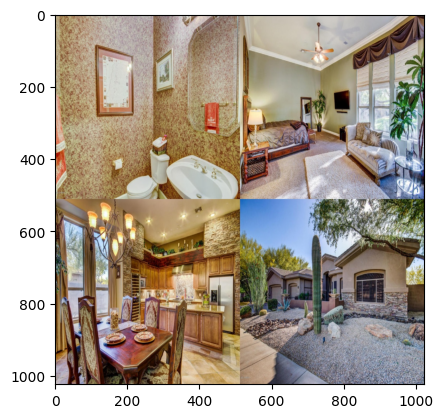

In [5]:
plt.imshow(example[...,::-1])

In [6]:
# reading the csv files and putting them in train_df and test_df

train_df = pd.read_csv(os.path.join(inputPath, "train.csv"))
test_df = pd.read_csv(os.path.join(inputPath, "test.csv"))
train = train_df
test = test_df

print(train_df.head())
print(test_df.head())


   House ID  Bedrooms  Bathrooms  Area  Latitude  Longitude   Price
0         1         4        4.0  4053   33.6968  -111.8892  869500
1         2         4        3.0  3343   34.8280  -119.0349  865200
2         3         3        4.0  3923   33.7669  -111.9182  889000
3         4         5        5.0  4022   33.7752  -111.7791  910000
4         5         3        4.0  4116   33.7669  -111.9182  971226
   House ID  Bedrooms  Bathrooms  Area  Latitude  Longitude
0       501         3        2.0  2330   35.6406  -120.7003
1       502         3        2.5  1339   35.6406  -120.7003
2       503         3        2.0  1472   35.6406  -120.7003
3       504         4        4.0  2681   35.6406  -120.7003
4       505         3        2.5  1935   33.8085  -117.9228


In [7]:
# Counting Train and Test Images

num_train_images = len(os.listdir(os.path.join(inputPath, "Train")))
num_test_images = len(os.listdir(os.path.join(inputPath, "Test")))
# Creating File Lists
train_filenames = [str(i) + ".jpg" for i in range(1, num_train_images + 1)]
test_filenames = [str(i) + ".jpg" for i in range(1, num_test_images + 1)]

train_labels = train_df["House ID"]
test_labels = test_df["House ID"]

train_files = [os.path.join(inputPath, "Train", filename) for filename in train_filenames]
test_files = [os.path.join(inputPath, "Test", filename) for filename in test_filenames]

# showing label incase we need them
print(train_files)
print(test_files)

['C:/Users/latic/Downloads/verkoopprijzen-van-huizen-voorspellen\\Train\\1.jpg', 'C:/Users/latic/Downloads/verkoopprijzen-van-huizen-voorspellen\\Train\\2.jpg', 'C:/Users/latic/Downloads/verkoopprijzen-van-huizen-voorspellen\\Train\\3.jpg', 'C:/Users/latic/Downloads/verkoopprijzen-van-huizen-voorspellen\\Train\\4.jpg', 'C:/Users/latic/Downloads/verkoopprijzen-van-huizen-voorspellen\\Train\\5.jpg', 'C:/Users/latic/Downloads/verkoopprijzen-van-huizen-voorspellen\\Train\\6.jpg', 'C:/Users/latic/Downloads/verkoopprijzen-van-huizen-voorspellen\\Train\\7.jpg', 'C:/Users/latic/Downloads/verkoopprijzen-van-huizen-voorspellen\\Train\\8.jpg', 'C:/Users/latic/Downloads/verkoopprijzen-van-huizen-voorspellen\\Train\\9.jpg', 'C:/Users/latic/Downloads/verkoopprijzen-van-huizen-voorspellen\\Train\\10.jpg', 'C:/Users/latic/Downloads/verkoopprijzen-van-huizen-voorspellen\\Train\\11.jpg', 'C:/Users/latic/Downloads/verkoopprijzen-van-huizen-voorspellen\\Train\\12.jpg', 'C:/Users/latic/Downloads/verkooppri

# Exploratory Data Analysis

In [8]:
train_df = pd.DataFrame(train_df)

print(train_df.head())

print(train_df.describe())

print(train_df.isnull().sum())
# no NAN values
#latitude values are close together same goes for longitude.
#nothing unexpected


   House ID  Bedrooms  Bathrooms  Area  Latitude  Longitude   Price
0         1         4        4.0  4053   33.6968  -111.8892  869500
1         2         4        3.0  3343   34.8280  -119.0349  865200
2         3         3        4.0  3923   33.7669  -111.9182  889000
3         4         5        5.0  4022   33.7752  -111.7791  910000
4         5         3        4.0  4116   33.7669  -111.9182  971226
         House ID    Bedrooms   Bathrooms        Area    Latitude   Longitude  \
count  500.000000  500.000000  500.000000   500.00000  500.000000  500.000000   
mean   250.500000    3.350000    2.669500  2369.64600   35.128844 -116.469049   
std    144.481833    1.172283    1.017578  1208.18261    2.386173    6.554434   
min      1.000000    1.000000    1.000000   701.00000   32.631500 -122.368300   
25%    125.750000    2.000000    2.000000  1440.00000   33.808200 -119.802500   
50%    250.500000    3.000000    2.500000  2097.50000   33.920800 -117.609600   
75%    375.250000    4.00

In [9]:
test_df
#latitude/longitude values are the same or close together

,House ID,Bedrooms,Bathrooms,Area,Latitude,Longitude
0,501,3,2.0,2330,35.6406,-120.7003
1,502,3,2.5,1339,35.6406,-120.7003
2,503,3,2.0,1472,35.6406,-120.7003
3,504,4,4.0,2681,35.6406,-120.7003
4,505,3,2.5,1935,33.8085,-117.9228
5,506,3,2.0,1471,33.8085,-117.9228
6,507,3,2.0,1248,33.8085,-117.9228
7,508,3,1.5,1214,33.8085,-117.9228
8,509,4,3.0,1882,33.8085,-117.9228
9,510,2,2.5,987,33.8085,-117.9228


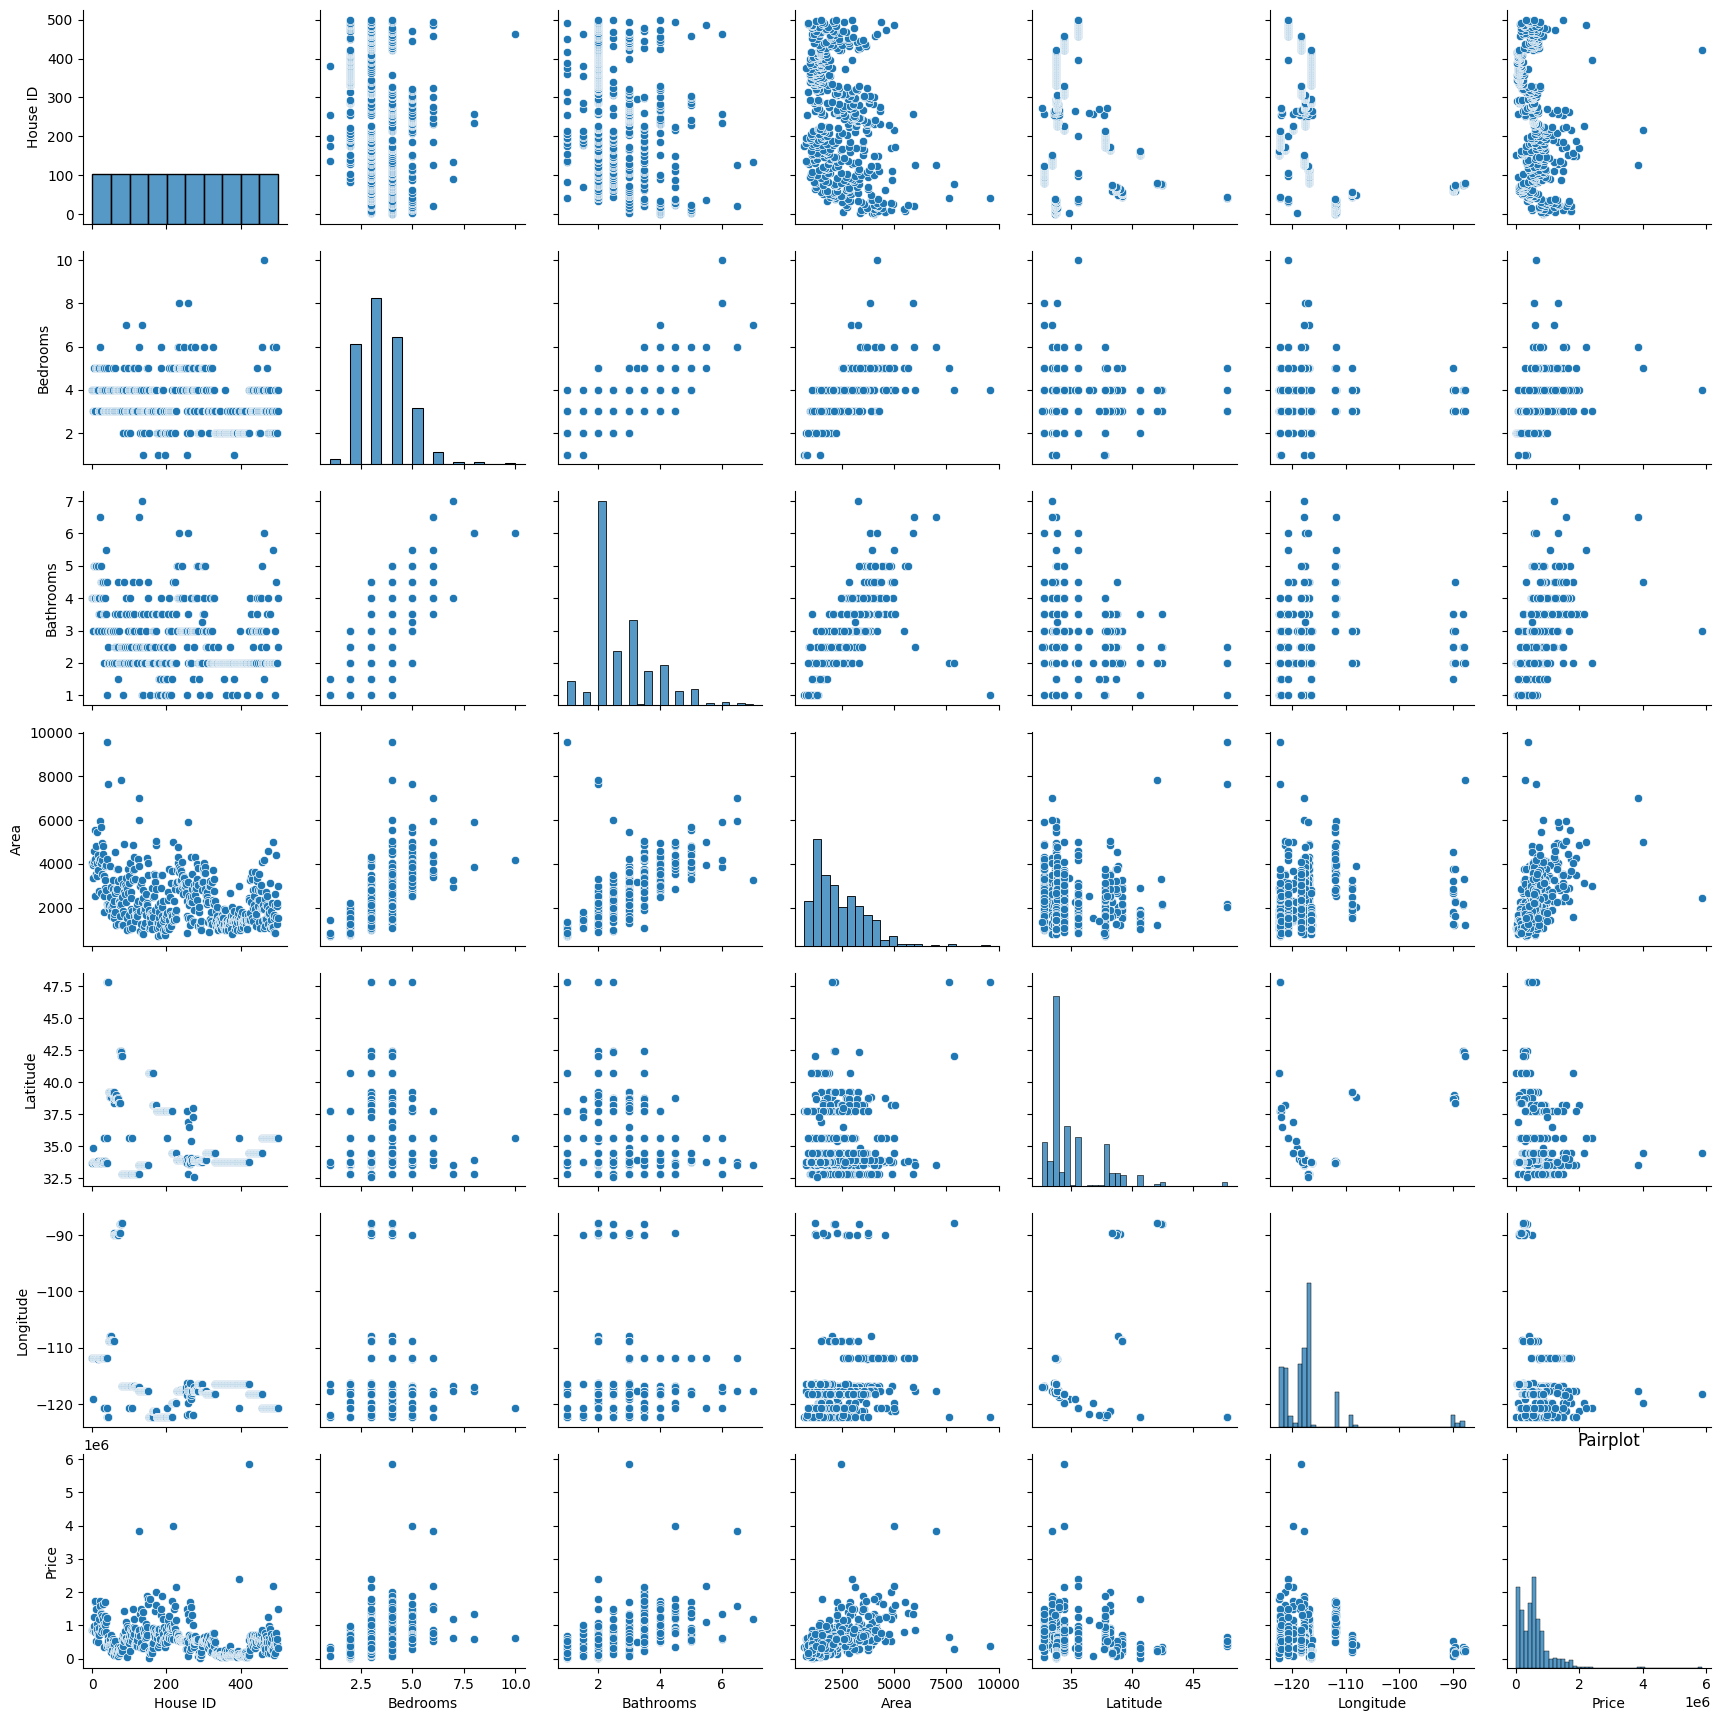

In [10]:

sns.pairplot(train_df)
plt.title('Pairplot')
plt.show()



Prices have high variance with some outliers.
Bedrooms, Bathrooms, Area values seem to go to the top right in comparison to Price wich indicates that these 3 have high correlation with the price and are the most important columns.

We also see Bathrooms arent always integers. we also see values like 1.5, 2.5 etc. This probaply means these bathrooms only contain toilets.
As stated before we clearly see some houses have the same longitude and latitude values. this means the selection of houses seems to have a bias. We dont have a way to negate this exept adjust the weights if needed.
We chose Pairplots because it shows a lot it different perspectives and viewpoints into the structure of the data.

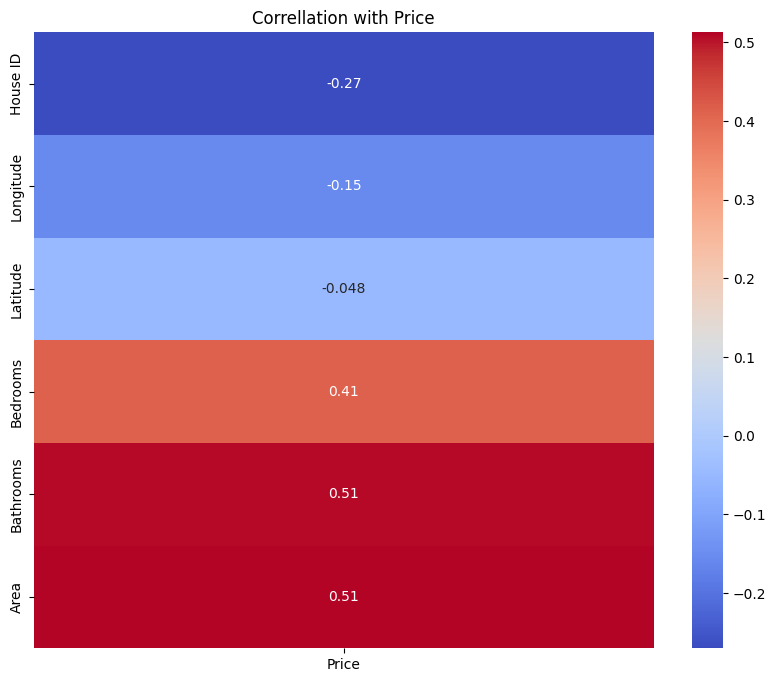

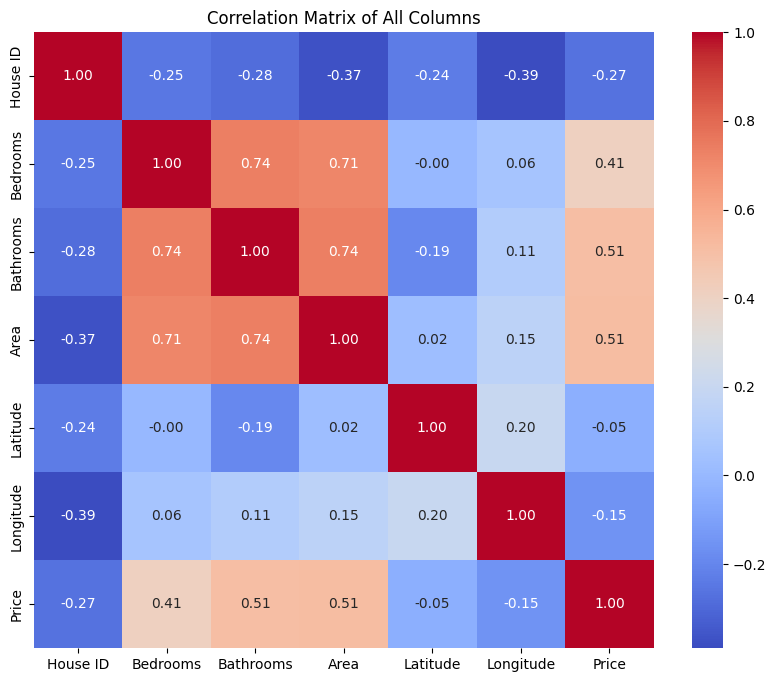

In [11]:
plt.figure(figsize=(10, 8))
price_corr = train_df.corr()['Price'].drop('Price',)
price_corr_sorted = price_corr.sort_values()
sns.heatmap(price_corr_sorted.to_frame(), annot=True, cmap='coolwarm')
plt.title('Correllation with Price')
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
correlation_matrix = train_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of All Columns')
plt.show()



Area, Bathrooms and Bedrooms all have high correlations to the Price, we also see these 3 all correlate to eachother to a relatively high degree.
This is logical since a expensive large house probaply has more bed/bathrooms than average.

We chose to show correlation to price seperatly because it is the most important, we also showed correlation between other columns because like we see now some columns might be correlated to eachother what could explain why multiple columns have close to the same correlation to the Price column, for example Bedrooms and Bathrooms

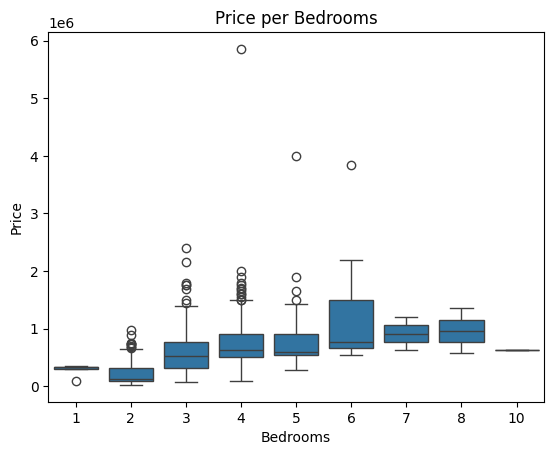

In [12]:
plt.figure()
sns.boxplot(x='Bedrooms', y='Price', data=train_df)
plt.title('Price per Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()

we see a small set of 1 bedroom houses, a lot of outlier houses with 3,4,5 bedrooms in comparison others even if they contain a larger set of values.

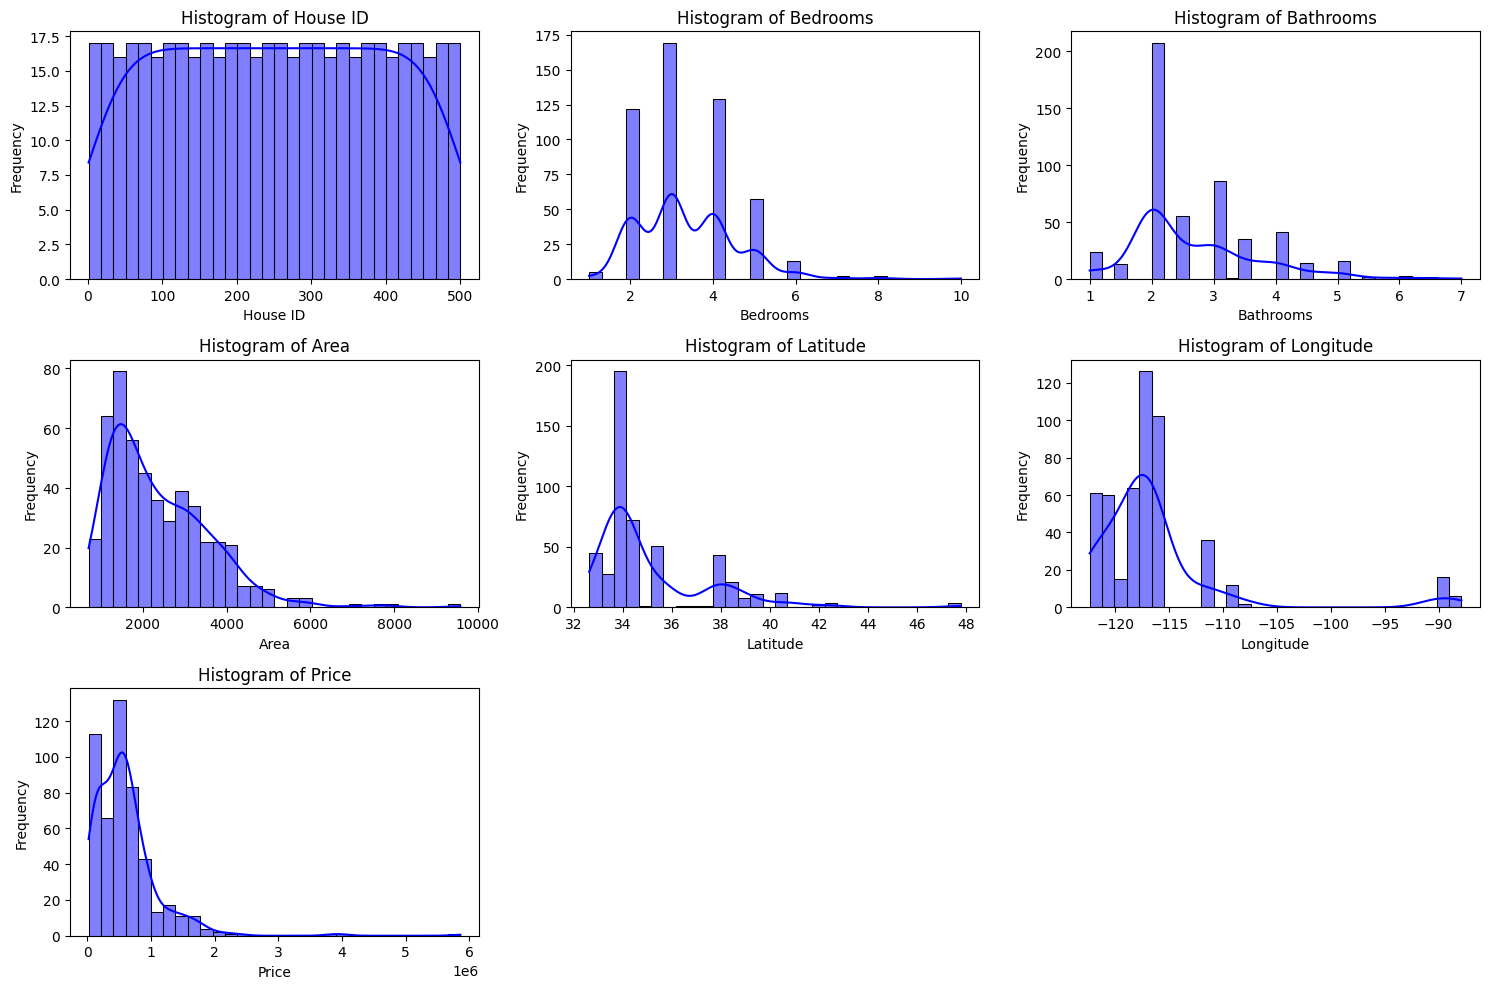

In [13]:
plt.figure(figsize=(15, 10))
for i, c in enumerate(train_df.select_dtypes(include='number').columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(train_df[c], kde=True, color='blue', bins=30)
    plt.title(f'Histogram of {c}')
    plt.xlabel(c)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()



all graphs seem to be right-skewed, good visualisation of how much price, Area, Bathrooms and Bedroom frequency distributions look alike
We chose for histograms because the explained features are best visualised in this way and shows how how frequent outliers are and where they are

# Fully-Connected Neural Network


Shape of X_train: (400, 5)
Shape of y_train: (400,)


C:\Users\latic\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,649 (45.50 KB)

 Trainable params: 11,649 (45.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 99.9999 - val_loss: 99.9994
Epoch 2/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 99.9993 - val_loss: 99.9979
Epoch 3/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 99.9973 - val_loss: 99.9928
Epoch 4/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 99.9913 - val_loss: 99.9764
Epoch 5/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 99.9737 - val_loss: 99.9303
Epoch 6/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 99.9210 - val_loss: 99.8084
Epoch 7/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 99.7714 - val_loss: 99.5262
Epoch 8/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 99.5143 - val_loss: 98.9414
Epoch 9/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 98.8667 - val_loss: 97.8489
Epoch 10/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 97.8074 - val_loss: 95.8257
Epoch 11/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 95.5340 - val_loss: 92.4602
Epoch 12/1000
18/18 ━━━━━━━━━

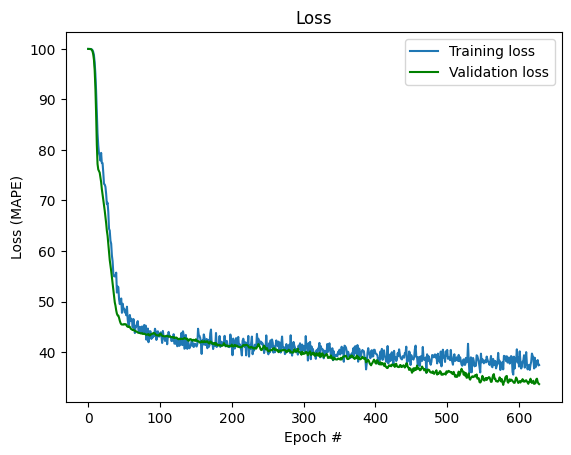

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 30.6573  
Test loss (MAPE): 28.589996337890625


In [14]:
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, Sequential
from tensorflow.keras.losses import MeanAbsolutePercentageError
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

# Data Preprocessing

x_train = train_df.drop(columns=['House ID', 'Price']).values
y_train = train_df['Price'].values

X_train, X_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definieer Model
model = Sequential([
    layers.Dense(128, activation="relu", input_shape=(X_train_scaled.shape[1],)),
    layers.Dropout(0.2),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(32, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(1, activation="linear")
])

model.summary()

# Model Compilatie en Training
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss='mean_absolute_percentage_error')

early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)

history = model.fit(X_train_scaled, y_train, validation_split=0.1, epochs=1000, batch_size=20, verbose=1, callbacks=[early_stopping])

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], 'g', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('Loss (MAPE)')
plt.title('Loss')
plt.legend()
plt.show()

# Model Evaluatie
test_loss = model.evaluate(X_test_scaled, y_test)
print("Test loss (MAPE):", test_loss)


First we normalize the data, this is a standard procedure when training a neural network. It helps make sure that all features are in the same scale. This helps find the optimal weights of the features and improves the prediction of the model overall.

Activation function

We chose to use the linear activation function in the output layer.
We chose for this function because when dealing with regression problems like in our case we don’t need a non-linear activation function and we will get a prediction based on a linear combination of the input features. In the remaining layers we used the RELU activation function. It changes negative values to zero and leaves positive values, by using ReLU in all layers except  the last layer we can help lay-out complex patterns in the data. We also negate the vanishing gradient problem by not altering positive values to improve the ‘stream’ of gradients whilst training the NN

Optimizer

We used the Adam-optimizer (Adaptive Moment Estimation).
The reason for it is that it estimates the needed the learning speed of every parameter based the first and second gradient, it helps with efficient convergence and because of that better performance. In the code we used a learning speed of 0.001 after many trial and error runs with this value as the best

Dropout-layers

We used dropout-layers between the dense layers to negate any overfitting in the model, it randomly turns off neurons while the model is training. This helps make the model more robust.


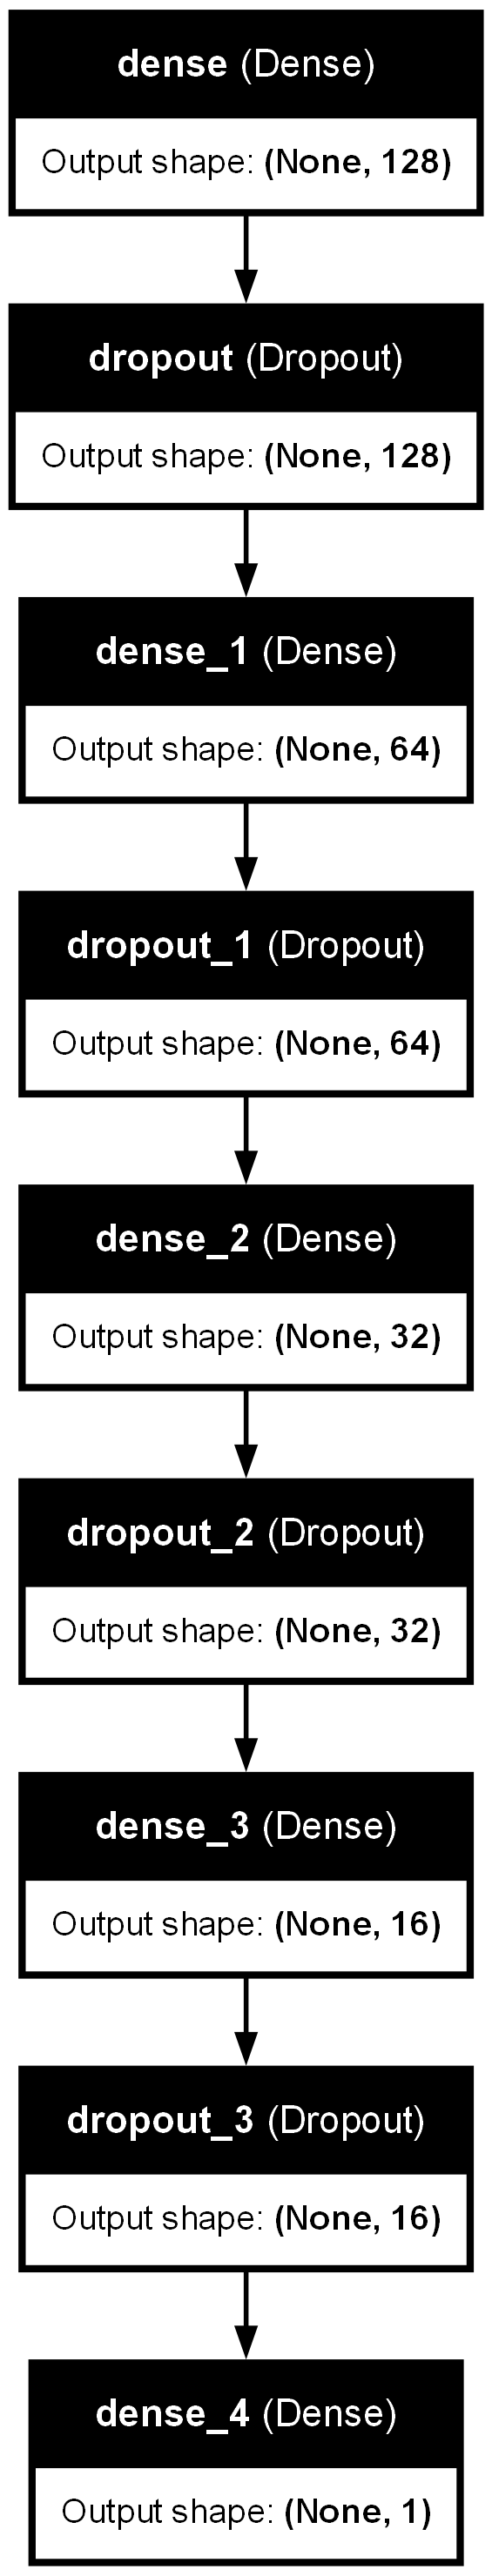

In [15]:
from tensorflow.keras.utils import plot_model

# Visualize the model structure
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
#bron: https://chat.openai.com/share/410f8111-1c61-4eb2-b787-ae60b038640f

# Exploring Image Data

In [16]:
# Define read_images_from_directory function
def read_images_from_directory(directory_path, num_images):
    """
    Reads images from a directory.

    Args:
        directory_path : Path to the directory
        num_images : Number of images

    Returns:
        images: List of images.
        labels: List of labels.
    """
    images = []
    labels = []
    for i in range(1, num_images + 1):
        image_path = os.path.join(directory_path, f"{i}.jpg")
        if os.path.exists(image_path):
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            if image is not None:
                images.append(image)
                label = int(os.path.splitext(os.path.basename(image_path))[0])
                labels.append(label)
    return images, labels



In [17]:
# Read Images and Prepare Data

train_directory = os.path.join(inputPath, "Train")
num_images = 500
train_images, train_labels = read_images_from_directory(train_directory, num_images)

x_train, x_test, y_train, y_test = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

x_train = x_train / 255.0
x_test = x_test / 255.0

input_shape = x_train[0].shape

x_train = x_train.reshape(x_train.shape[0], input_shape[0], input_shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], input_shape[0], input_shape[1], 1)

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


x_train shape: (400, 1024, 1024, 1)
x_test shape: (100, 1024, 1024, 1)
y_train shape: (400,)
y_test shape: (100,)


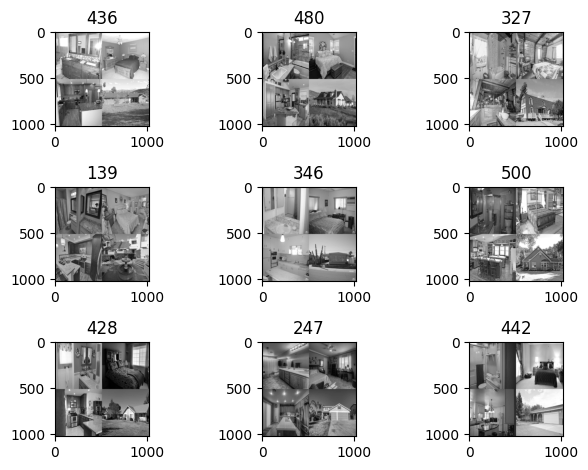

In [18]:
# Display Random Sample of Training Images
indices = np.random.choice(len(x_train), size=9, replace=False)

for count, value in enumerate(indices):
    plt.subplot(3, 3, count+1)
    plt.imshow(x_train[value], cmap="gray")
    plt.title(y_train[value])

plt.tight_layout()
plt.show()


In [19]:
# defining function for visualizing the data


def display_images(images, num_samples=5):
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))
    for i in range(num_samples):
        axes[i].imshow(images[i], cmap='gray')
        axes[i].axis('off')
    plt.show()

def display_histograms(images, num_samples=5):
    for i, image in enumerate(images[:num_samples]):
        histogram = cv2.calcHist([image], [0], None, [256], [0, 256])
        plt.plot(histogram, color='black')
    plt.title('Example histograms of pixel values')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.show()



Number of images in the dataset: 500
Average image size: [1024. 1024.]
Average number of color channels: 1.0


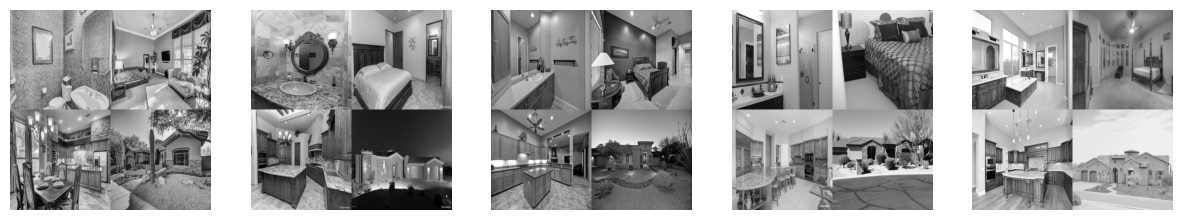

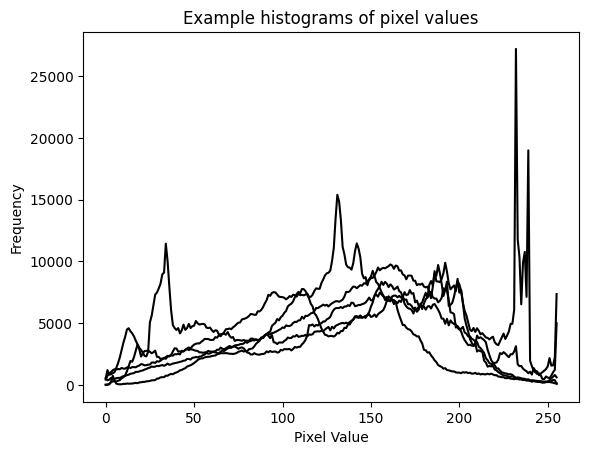

In [20]:
# visualizing data
num_images = len(train_images)
print("Number of images in the dataset:", num_images)

image_sizes = np.array([image.shape[:2] for image in train_images])
print("Average image size:", np.mean(image_sizes, axis=0))

num_channels = np.array([image.shape[2] if len(image.shape) == 3 else 1 for image in train_images])
print("Average number of color channels:", np.mean(num_channels))

display_images(train_images)
display_histograms(train_images)

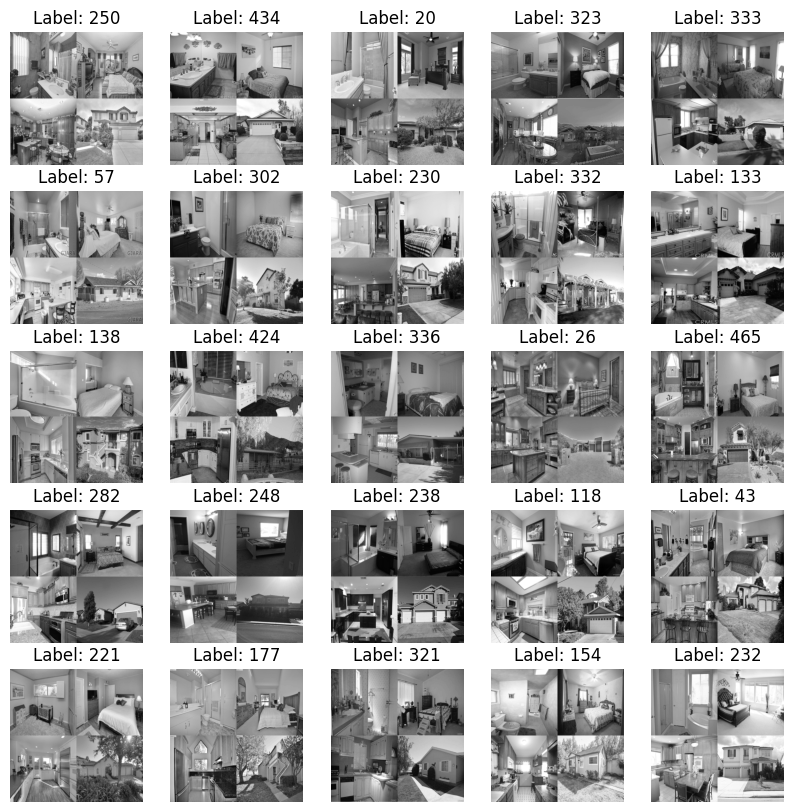

In [21]:
# Display Sample Images with Labels
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

de reden dat we het zwart wit maken is zodat kleur geen bias kan hebben.

In [22]:
def read_images_from_directory(directory_path, prefix, num_images):
    images = []
    for i in range(1, num_images + 1):
        image_path = os.path.join(directory_path, f"{prefix}{i}.jpg")
        if os.path.exists(image_path):
            image = cv2.imread(image_path)
            if image is not None:
                images.append(image)
            else:
                print(f"Failed to read image: {image_path}")
        else:
            print(f"Image not found: {image_path}")
    return images

train_directory = os.path.join(inputPath, "Train")
prefix = ""
num_images = 500

train_images = read_images_from_directory(train_directory, prefix, num_images)

for i in range(5):
    print(train_images[i])


[[[100 126 156]
  [110 137 164]
  [127 154 181]
  ...
  [ 54  42  62]
  [ 49  38  58]
  [ 43  32  52]]

 [[114 140 170]
  [120 147 174]
  [120 147 173]
  ...
  [ 48  37  57]
  [ 44  33  53]
  [ 40  31  51]]

 [[118 147 174]
  [128 157 184]
  [117 148 171]
  ...
  [ 41  32  53]
  [ 38  29  50]
  [ 38  31  52]]

 ...

 [[199 192 195]
  [203 197 202]
  [199 199 205]
  ...
  [196 163 144]
  [131  86  65]
  [101  53  29]]

 [[199 194 196]
  [200 197 199]
  [197 200 204]
  ...
  [181 145 127]
  [124  81  64]
  [136  93  74]]

 [[201 196 198]
  [197 196 198]
  [194 197 201]
  ...
  [159 123 105]
  [127  86  71]
  [181 138 123]]]
[[[175 203 227]
  [175 203 227]
  [176 202 226]
  ...
  [192 182 194]
  [201 184 195]
  [200 180 192]]

 [[177 205 229]
  [176 204 228]
  [178 204 228]
  ...
  [191 181 193]
  [195 179 190]
  [193 176 187]]

 [[179 207 231]
  [178 206 230]
  [180 206 230]
  ...
  [192 182 194]
  [191 177 188]
  [190 174 185]]

 ...

 [[196 226 243]
  [197 230 245]
  [200 233 248]
  ..

Number of images in the dataset: 500
Average image size: [1024. 1024.]
Average number of color channels: 3.0


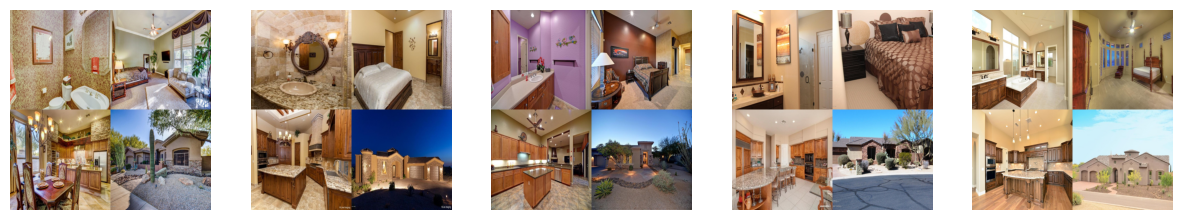

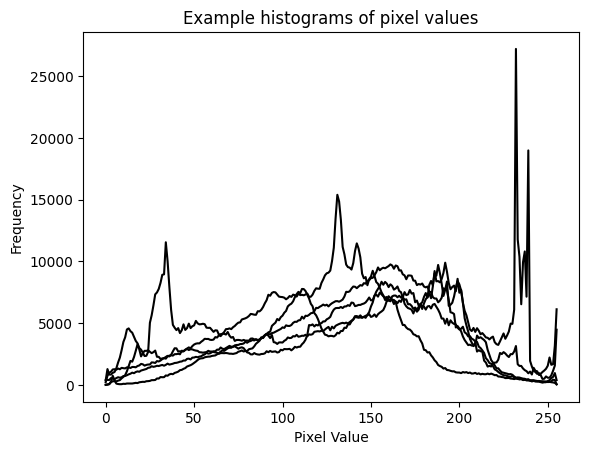

In [23]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def display_images(images, num_samples=5):
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))
    for i in range(num_samples):
        axes[i].imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        axes[i].axis('off')
    plt.show()

def display_histograms(images, num_samples=5):
    for i, image in enumerate(images[:num_samples]):
        histogram = cv2.calcHist([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)], [0], None, [256], [0, 256])
        plt.plot(histogram, color='black')
    plt.title('Example histograms of pixel values')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.show()

num_images = len(train_images)
print("Number of images in the dataset:", num_images)

image_sizes = np.array([image.shape[:2] for image in train_images])
print("Average image size:", np.mean(image_sizes, axis=0))

num_channels = np.array([image.shape[2] if len(image.shape) == 3 else 1 for image in train_images])
print("Average number of color channels:", np.mean(num_channels))


display_images(train_images)
display_histograms(train_images)


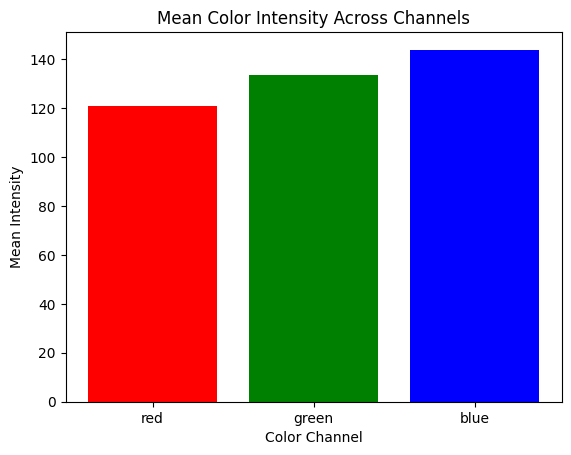

In [24]:
import os

def get_class_labels(directory):
    return [d for d in os.listdir(directory) if os.path.isdir(os.path.join(directory, d))]

def plot_mean_color_intensity(images):
    mean_intensity = np.mean(images, axis=(0, 1, 2))
    colors = ['red', 'green', 'blue']
    plt.bar(colors, mean_intensity, color=colors)
    plt.title('Mean Color Intensity Across Channels')
    plt.xlabel('Color Channel')
    plt.ylabel('Mean Intensity')
    plt.show()

class_labels = get_class_labels(inputPathtrain)

plot_mean_color_intensity(train_images)


In [25]:
earlystop = EarlyStopping(monitor='val_loss', patience=10)

In [26]:
#batch_size = len(train_images)
# Dit is het antwoord, maar de applicatie crasht door te weinig ram.
batch_size = 50
img_height, img_width, _ = train_images[0].shape

print(batch_size)
print(img_height)
print(img_width)


50
1024
1024


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Split the list of image arrays into training and validation sets
train_images, val_images = train_test_split(train_images, test_size=0.2, random_state=123)

# Display the number of images in the training and validation sets
print("Number of images in training set:", len(train_images))
print("Number of images in validation set:", len(val_images))
from pathlib import Path

Number of images in training set: 400
Number of images in validation set: 100


SOURCES:


Deep Learning Specialization on Coursera by Andrew Ng.
Deep Learning Book by Ian Goodfellow, Yoshua Bengio, and Aaron Courville.
Keras Documentation for details on building neural networks using Keras

Convolutioneel neuraal netwerk (CNN)

Luca o




Hier maak ik gebruik van **tf.keras.utils.image_dataset_from_directory** function om trainings- en validatiedatasets te maken voor een Convolutioneel Neuraal Netwerk (CNN).

In [28]:
img_train = tf.keras.utils.image_dataset_from_directory(
  inputPathtrain,
  validation_split=0.2,
  subset="training",
  seed=45,
  label_mode=None,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 500 files.
Using 400 files for training.


Hier maak je een trainingsdataset (img_train). Laten we de parameters eens bekijken:

**'/content/drive/MyDrive/Projects/Deeplearning1/Train':** Dit is het pad naar de map waar je trainingsafbeeldingen zich bevinden. De functie zal deze map doorzoeken en de afbeeldingen laden.

**validation_split=0.2**: Dit betekent dat 20% van de gegevens zal worden gebruikt als validatieset. Met andere woorden, 80% van de gegevens worden gebruikt voor training en 20% voor validatie.

**subset="training"**: Hier geef je aan dat dit deel van de dataset moet worden gebruikt als de trainingssubset.

**seed=45**: Dit is de willekeurige zaadwaarde voor het splitsen van de gegevens. Het zorgt ervoor dat als je het script opnieuw uitvoert, je dezelfde splitsing krijgt.

**label_mode=None**: Dit betekent dat de labels niet worden geladen, wat betekent dat je waarschijnlijk ongelabelde gegevens hebt of dat de mapstructuur van de gegevens de klassen aangeeft.

**image_size=(img_height, img_width)**: Hier stel je de grootte in van de afbeeldingen die zullen worden gebruikt voor training.

**batch_size=batch_size**: Dit is de grootte van de batches afbeeldingen die worden gebruikt tijdens training.


In [29]:
img_val = tf.keras.utils.image_dataset_from_directory(
  inputPathtrain,
  validation_split=0.2,
  subset="validation",
  seed=45,
  label_mode=None,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 500 files.
Using 100 files for validation.


Hier maak je een validatiedataset (img_val). De parameters zijn grotendeels hetzelfde als die voor de trainingsdataset, behalve:

subset="validation": Dit geeft aan dat dit deel van de dataset moet worden gebruikt als de validatiesubset.
Dus wat er gebeurt is dat je je trainings- en validatiedatasets opzet vanaf de gegeven map. De trainingsdataset bevat 80% van de afbeeldingen voor het trainen van je CNN-model, terwijl de validatiedataset 20% van de afbeeldingen bevat die worden gebruikt om de prestaties van het model te valideren tijdens het trainen (om overpassing te voorkomen).

In deze cel converteren we de foto's in ons dataset naar een Tensor dataset, en daar voegen we een label bij toe uit de data van 'House ID'. Dit hebben wij geleerd tijdens de lessen van Deep Learning (Beeldclassificatie met CNNs - Flowers deel 1) & (Flowers deel 2 - Hyperparameter tuning)

.cache(): Dit zorgt ervoor dat de dataset in het geheugen of op schijf wordt gecachet. Dit kan de trainingspipeline versnellen, vooral bij herhaalde iteraties over de dataset.

.shuffle(1000): Dit mengt de gegevens met een buffer van grootte 1000. Dit helpt bij het introduceren van willekeur in de trainingsdata, wat belangrijk is voor een goede training.

.prefetch(buffer_size=AUTOTUNE): Dit laadt gegevens voor de volgende batch terwijl de huidige batch wordt verwerkt, waardoor de trainingssnelheid kan toenemen.

In [30]:
img_directory = inputPathtrain
image_size = (1024, 1024)
batch_size = 4

image_dataset = tf.keras.utils.image_dataset_from_directory(
    img_directory,
    label_mode=None,
    image_size=image_size,
    batch_size=batch_size
)

image_file_paths = image_dataset.file_paths
image_hids = [Path(image_file_path).stem for image_file_path in image_file_paths]
image_hids_int = [int(house_id) for house_id in image_hids]

tabular_data = train.loc[train['House ID'].isin(image_hids_int)].drop(columns=['House ID', 'Price'])

tabular_dataset = tf.data.Dataset.from_tensor_slices(tabular_data).batch(batch_size)

labels = [train.loc[train['House ID'] == houseid, 'Price'].values for houseid in image_hids_int]
labels_dataset = tf.data.Dataset.from_tensor_slices(labels).batch(batch_size)
final_dataset = tf.data.Dataset.zip((image_dataset, labels_dataset))
combined_dataset = tf.data.Dataset.zip((final_dataset, tabular_dataset))


Found 500 files.


In [31]:
img_directory = inputPathtrain
image_size = (1024, 1024)
batch_size = 4

image_dataset = tf.keras.utils.image_dataset_from_directory(
    img_directory,
    label_mode=None,
    image_size=image_size,
    batch_size=batch_size
)

image_file_paths = image_dataset.file_paths
image_hids = [Path(image_file_path).stem for image_file_path in image_file_paths]
image_hids_int = [int(house_id) for house_id in image_hids]

tabular_data = train.loc[train['House ID'].isin(image_hids_int)].drop(columns=['House ID', 'Price'])

tabular_dataset = tf.data.Dataset.from_tensor_slices(tabular_data).batch(batch_size)

labels = [train.loc[train['House ID'] == houseid, 'Price'].values for houseid in image_hids_int]
labels_dataset = tf.data.Dataset.from_tensor_slices(labels).batch(batch_size)
final_dataset = tf.data.Dataset.zip((image_dataset, labels_dataset))
combined_dataset = tf.data.Dataset.zip((final_dataset, tabular_dataset))

def image_load(img_dir):
  img_directory = img_dir

  image_size = (1024, 1024)
  batch_size = 4
  image_dataset = tf.keras.utils.image_dataset_from_directory(
      img_directory,
      label_mode=None, 
      image_size=image_size,
      batch_size=batch_size
  )
  return image_dataset

def image_labels(image_dataset,csv):
  image_file_paths = image_dataset.file_paths
  train = pd.read_csv(csv)


  image_hids = [Path(image_file_path).stem for image_file_path in image_file_paths]
  image_hids_int = [int(house_id) for house_id in image_hids]

  labels = [train.loc[train['House ID'] == houseid, 'Price'].values for houseid in image_hids_int]

  labels_dataset = tf.data.Dataset.from_tensor_slices(labels).batch(batch_size)

  final_dataset = tf.data.Dataset.zip((image_dataset, labels_dataset))
  return final_dataset

def preprocess_img(final_dataset,choose=2):
  test= choose
  img_height, img_width = 256, 256  
  if test == 1:
    final_dataset = final_dataset.map(lambda x, y: (tf.image.resize(x, (img_height, img_width)), y))
    num_samples = sum(1 for _ in final_dataset)
    val_size = int(0.2 * num_samples) 

    val_dataset = final_dataset.take(val_size)
    train_dataset = final_dataset.skip(val_size)

    AUTOTUNE = tf.data.AUTOTUNE

    train_dataset = train_dataset.cache().shuffle(5).prefetch(buffer_size=AUTOTUNE)
    val_dataset = val_dataset.cache().prefetch(buffer_size=AUTOTUNE)
    return train_dataset, val_dataset
  elif test == 0:
    final_dataset = final_dataset.map(lambda x: (tf.image.resize(x, (img_height, img_width))))
    return final_dataset
  else:
    return print('Please choose 1 for train and 0 for test')
Images_labeled= image_labels(image_load(inputPathtrain),"C:/Users/latic/Downloads/verkoopprijzen-van-huizen-voorspellen/train.csv")
train_dataset, val_dataset = preprocess_img(Images_labeled, choose = 1)

Found 500 files.
Found 500 files.


In [32]:
AUTOTUNE = tf.data.AUTOTUNE

img_train = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
img_val = val_dataset.cache().prefetch(buffer_size=AUTOTUNE)


Hier worden de afbeeldingen in de trainings- en validatiedatasets opnieuw geschaald naar een gewenste grootte van 256x256 pixels. Dit is vaak een standaardpreprocessingstap om alle afbeeldingen in een uniforme grootte te hebben.

In [33]:
img_height = 256
img_width = 256
train_horse = img_train.map(lambda x, y: (tf.image.resize(x, (img_height, img_width)), y))
val_horse = img_val.map(lambda x, y: (tf.image.resize(x, (img_height, img_width)), y))

In [34]:
input_shape= (256, 256, 3)
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)


Modelleren


Na de image pipeline te hebben gebruikt, kunnen we eindelijk beginnen met het modelleren. Hier laten wij zien hoe we het model hebben opgezet, en zullen we onze keuzes uitleggen.


**Onderbouw je keuzes van het aantal convolutionele lagen, poollagen, convolutionele
kernels per laag, het aantal fully-connected lagen en het aantal neuronen per laag**


**Convolutionele Lagen (Conv2D):
We hebben drie convolutionele lagen gebruikt. Dit aantal is typisch voor een CNN-architectuur voor beeldclassificatie. Het helpt bij het extraheren van verschillende niveaus van kenmerken uit de invoerbeelden.
Elke Conv2D-laag heeft 126 kernels. Dit is een keuze op basis van het experiment en kan variëren op basis van de complexiteit van de dataset. Een hoger aantal kernels kan helpen bij het leren van meer complexe patronen en functies in de gegevens. Wij hebben geexperimenteerd met veschillende kernels, en 126 gaf ons de laagste loss.



**Poollagen (MaxPooling2D):
Na elke convolutionele laag hebben we een MaxPooling2D-laag toegevoegd. Deze lagen verminderen de dimensionaliteit van de gegevens door de ruimtelijke afmetingen te verkleinen. Dit helpt om overfitting te voorkomen en computationele efficiëntie te verbeteren.

**Batch Normalization (BatchNormalization):
Batch Normalization-lagen zijn opgenomen na elke Conv2D-laag om de trainingsstabiliteit en de snelheid van het trainen te verbeteren. Ze helpen bij het normaliseren van de activaties van een vorige laag, waardoor het gemakkelijker wordt voor de volgende laag om te leren.

**Aantal Neuronen in de Volledig Verbonden Lagen (Dense):
We hebben twee volledig verbonden (Dense) lagen gebruikt na het flattenen van de gegevens.
De eerste Dense-laag heeft 100 neuronen. Dit aantal neuronen is een keuze op basis van de complexiteit van de gegevens en kan worden aangepast afhankelijk van het gewenste modelcomplexiteit.

In [35]:
cnn_model = keras.Sequential([
    keras.layers.Conv2D(126, activation='relu', kernel_size=3, input_shape=(256,256,3)),
    keras.layers.MaxPooling2D(),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(126, activation='relu', kernel_size=3),
    keras.layers.MaxPooling2D(),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(126, activation='relu', kernel_size=3),
    keras.layers.MaxPooling2D(),
    keras.layers.BatchNormalization(),
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(1)
])

C:\Users\latic\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [36]:
opt= keras.optimizers.Adam(learning_rate=0.0001)

cnn_model.compile(optimizer=opt,
              loss='mape')
cnn_history = cnn_model.fit(train_horse, epochs=100, validation_data=val_horse, callbacks=[stop_early])




Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 75s 694ms/step - loss: 99.8635 - val_loss: 99.3001
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 68s 678ms/step - loss: 98.8433 - val_loss: 97.8060
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 68s 683ms/step - loss: 96.5603 - val_loss: 95.5612
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 68s 677ms/step - loss: 94.0183 - val_loss: 92.9375
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 72s 716ms/step - loss: 91.9187 - val_loss: 90.1170
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 76s 760ms/step - loss: 86.3920 - val_loss: 84.5956
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 71s 710ms/step - loss: 81.7514 - val_loss: 81.2089
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 72s 721ms/step - loss: 81.0648 - val_loss: 79.0407
Epoch 9/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 71s 708ms/step - loss: 78.1947 - val_loss: 77.0823
Epoch 10/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 71s 713ms/step - loss: 75.4820 - val_loss: 76.6399
Epoch 11/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 71s 709ms/step - loss: 73.2874 - val_

**Compile je model met je gekozen lossfunctie en optimizer, en train deze op de
afbeeldingen.**

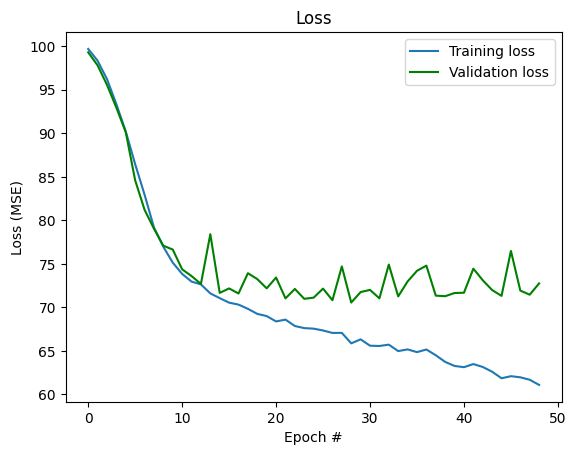

In [37]:
plt.plot(cnn_history.history['loss'], label='Training loss')
plt.plot(cnn_history.history['val_loss'], 'g', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('Loss (MSE)')
plt.title('Loss')
plt.legend()
plt.show()

Plot je modelarchitectuur met behulp van een geschikte visualisatietool.

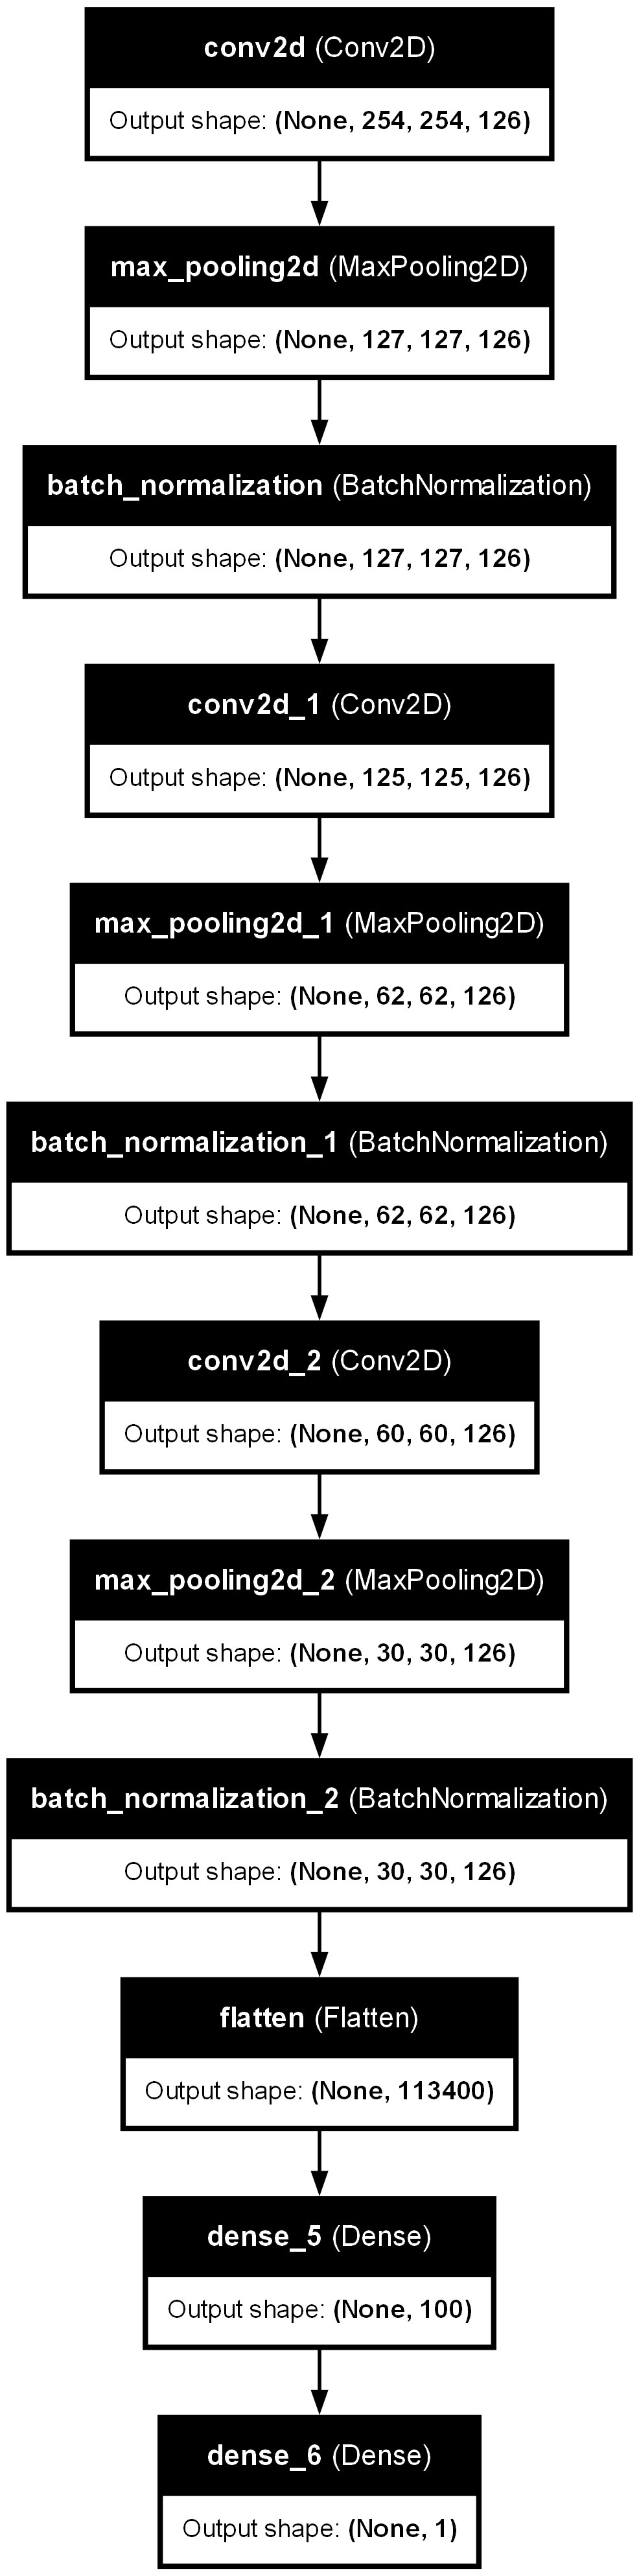

In [38]:
tf.keras.utils.plot_model(cnn_model, to_file='horse.png', show_shapes=True, show_layer_names=True)
#??????????????????????????????????????????????????????????????????????????????????????
# Hoort te werken

**Gebruik een of meer van de volgende technieken in je model. Beschrijf en motiveer
je keuze:
o L1 regularisatie
o L2 regularisatie
o Dropout
o Batchnorm**

Dropout: (Science & Science, 2024),  (Brownlee, 2019)
Dropout is een techniek waarbij willekeurig geselecteerde eenheden in een laag worden uitgeschakeld tijdens het trainen. Dit betekent dat deze eenheden niet bijdragen aan het voorwaarts- of achterwaarts doorgeven van gegevens. Het helpt om co-adaptatie van neuronen te voorkomen en maakt het netwerk robuuster.
Dropout is effectief gebleken bij het voorkomen van overfitting, vooral in diepere netwerken. Het dwingt het netwerk om meer robuuste kenmerken te leren en vermindert de afhankelijkheid van specifieke neuronen.

Batch Normalization: (Team, z.d.)
Batch Normalization is een techniek waarbij de invoer van elke laag wordt genormaliseerd, meestal vóór de activatiefunctie. Dit helpt om de trainingsstabiliteit te verbeteren, de leercurve te versnellen en het risico op overfitting te verminderen.
Batch Normalization is handig in diepere netwerken waar interne covariance shift kan optreden. Het helpt het netwerk om sneller te convergeren tijdens het trainen en kan de algehele prestaties van het model verbeteren.


Volgens *Dropout vs. batch normalization: an empirical study of their impact to deep learning* van Christian Garbin1 · Xingquan Zhu1 · Oge Marques zijn er verschillende redenen tussen dropout en batch normalization. Ze zeggen bijvoorbeeld het volgende:

- Add batch normalization before attempting other changes: combined with increasing the learning rate (see next item), adding batch normalization improved accuracy by a
significant value without a significant increase of training time (tests 10, 11 and 12 in
Table 5). Because it is simple to add batch normalization, it is recommended to add it
as a baseline for further improvements in the network performance, before attempting
more costly hyperparameter changes.

Dit is de reden dat we als eerst batch normalization toevoegen aan ons model. Ook staat in de paper van Garbin, Zhu en Marques (2020) het volgende:

- Dropout rate and layer placement: try several dropout rates and dropout layer placement. While the tests in this paper resulted in lower accuracy (Table 5 – tests 6 to 9,
using only dropout, and tests 13 to 15, where dropout cancels out the batch normalization accuracy gains), [17] showed improved accuracy when dropout is used, but only
for specific dropout rates and in specific places in the network. The specific rates that
result in better accuracy vary by network configuration. Trial-and-error is still the best
method to find a good dropout rate and layer placement.

Dit is de reden dat we verschillende dropout rates hebben geprobeerd voor een beter resultaat op het model. 

In [39]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout
from tensorflow.keras import regularizers

# Definieer de CNN-architectuur met Batch Normalization en Dropout
cnn_model = keras.Sequential([
    Conv2D(126, activation='relu', kernel_size=3, input_shape=(256,256,3)),
    MaxPooling2D(),
    BatchNormalization(),
    Dropout(0.25),  # Dropout met 25% kans om een neuron uit te schakelen
    Conv2D(126, activation='relu', kernel_size=3),
    MaxPooling2D(),
    BatchNormalization(),
    Dropout(0.25),
    Conv2D(126, activation='relu', kernel_size=3),
    MaxPooling2D(),
    BatchNormalization(),
    Dropout(0.25),
    Flatten(),
    Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.01)),  # L2 Regularisatie met gewicht 0.01
    Dropout(0.5),
    Dense(1)
])

# Compileer het model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['mape'])

# Bekijk de samenvatting van het model
cnn_model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 126)  │         3,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 126)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 127, 127, 126)  │           504 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 127, 127, 126)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 126)  │       143,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 126)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 62, 62, 126)    │           504 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 62, 62, 126)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 126)    │       143,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 126)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 30, 30, 126)    │           504 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 30, 30, 126)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 113400)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 100)            │    11,340,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,631,261 (44.37 MB)

 Trainable params: 11,630,505 (44.37 MB)

 Non-trainable params: 756 (2.95 KB)

Beschrijf welke vormen van data augmentation (indien van toepassing ) geschikt zijn
voor dit probleem. Implementeer dit in je datapijplijn.


1. Horizontale en Verticale Flips:
Het spiegelen van afbeeldingen langs de horizontale en verticale as. Dit kan handig zijn als het niet uitmaakt of een object op zijn kop staat voor classificatie. Bij onze dataset, de House price dataset maken wij hier geen gebruik van.
2. Rotaties:
Het roteren van afbeeldingen met verschillende hoeken. Hierdoor kan het model patronen leren herkennen ongeacht de oriëntatie van het object. Dit zou handig kunnen zijn voor ons probleem met de huisprijzen, het model kan handige patronen zien, bijvoorbeeld een huis met een garage in de hoek is meer waard (?)

3. Breedte- en Hoogteschuiving:
Het verschuiven van de afbeelding in de breedte en hoogte. Hierdoor kan het model leren om objecten te herkennen, zelfs als ze niet perfect gecentreerd zijn.

4. Zoomen:
Het willekeurig inzoomen op delen van de afbeeldingen. Dit helpt het model om te leren om objecten te herkennen, zelfs als ze op verschillende schalen in de afbeelding voorkomen. Dit zou erg handig kunnen zijn voor ons probleem. Het model zou belangrijke delen van de afbeeldingen kunnen highlighten, bijvoorbeeld een mooie keuken, mooie auto's op de stoep of een diamant in de midden van de kamer. Dan weet je dat je huis duur is.

# Multimodal


In [51]:
image_size = (224, 224)
batch_size = 15

img_directory = "C:/Users/latic/Downloads/verkoopprijzen-van-huizen-voorspellen/Train"
# This loads the images but ignores the labels
# This loads the images but ignores the labels
image_dataset = tf.keras.utils.image_dataset_from_directory(
    img_directory,
    label_mode=None,  # Ignore directory-based labels
    image_size=image_size,
    batch_size=batch_size
)

# Extract file paths from the dataset
image_file_paths = image_dataset.file_paths

# Extract only file ID without extension from file paths
image_uuids = [Path(image_file_path).stem for image_file_path in image_file_paths]
image_uuids = [int(hid) for hid in image_uuids]

# Map each file path to its tabular features using the DataFrame
# Ensure the uuids in the DataFrame exactly match those in `image_uuids`
tabular_column_names = list(train_df.columns)
tabular_column_names.remove('House ID')
tabular_column_names.remove('Price')
tabular_features = [train_df.loc[train_df['House ID'] == uuid, tabular_column_names].values[0] for uuid in image_uuids]

# Convert the list of tabular features into a TensorFlow dataset
tabular_features_dataset = tf.data.Dataset.from_tensor_slices(tabular_features).batch(batch_size)

# Map each file path to its label using the DataFrame
# Ensure the uuids in the DataFrame exactly match those in `image_uuids`
labels = [train_df.loc[train_df['House ID'] == uuid, 'Price'].values[0] for uuid in image_uuids]


# Convert the list of labels into a TensorFlow dataset
labels_dataset = tf.data.Dataset.from_tensor_slices(labels).batch(batch_size)

# Combine the original image dataset with the labels dataset
final_dataset = tf.data.Dataset.zip((image_dataset, tabular_features_dataset), labels_dataset)


# Split dataset into training and validation
train_ds = final_dataset.take(80) # Use 25 batches for training
val_ds = final_dataset.skip(80) # Use remaining batches for validation

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


Found 500 files.


**Definiëren van Parameters:**

**image_size**: De grootte van de afbeeldingen die zullen worden gebruikt (224x224 pixels).
**batch_size**: Het aantal afbeeldingen dat tegelijkertijd in het netwerk wordt ingevoerd tijdens de training (15).

**Laden van Afbeeldingen**:
**img_directory**: Het pad naar de map met afbeeldingen.
**image_dataset**: Met behulp van tf.keras.utils.image_dataset_from_directory worden de afbeeldingen in batches geladen vanuit de opgegeven map. Hier worden geen labels geladen (label_mode=None) omdat de labels apart worden verwerkt.
Verwerken van Bestandspaden:

**image_file_paths**: De bestandspaden van de geladen afbeeldingen worden geëxtraheerd uit image_dataset.
**image_uuids**: Alleen de bestands-ID's zonder extensie worden uit de bestandspaden gehaald en geconverteerd naar integers.
Tabulaire Kenmerken Verkrijgen:

Voor elk bestand (afbeelding) wordt het overeenkomstige rij kenmerken (tabular features) opgehaald uit train_df (een DataFrame). Dit wordt gedaan door de rij in train_df te vinden die overeenkomt met het House ID dat overeenkomt met het bestands-ID.
tabular_features_dataset: De lijst van tabellaire kenmerken wordt omgezet in een TensorFlow-dataset met batches van grootte batch_size.
Labels Verkrijgen:

Voor elk bestand (afbeelding) wordt de overeenkomstige prijslabel opgehaald uit train_df (een DataFrame) op basis van het House ID.
labels_dataset: De lijst van labels wordt omgezet in een TensorFlow-dataset met batches van grootte batch_size.

**Combineren van Datasets:**
**final_dataset**: De originele afbeeldingsdataset (image_dataset), de tabellaire kenmerkendataset (tabular_features_dataset), en de labelsdataset (labels_dataset) worden gecombineerd met behulp van tf.data.Dataset.zip(). Dit creëert een multimodaal dataset waarbij elk element een afbeelding, bijbehorende tabellaire kenmerken en label bevat.

Verdeling in Trainings- en Validatiedatasets:
**train_ds:** Hier worden de eerste 80 batches van final_dataset genomen als het trainingsdataset.
**val_ds**: De overgebleven batches na de eerste 80 batches van final_dataset worden genomen als het validatiedataset.

**Optimalisatie van Data Loading:**
**AUTOTUNE**: Dit wordt gebruikt voor het optimaliseren van het laden van de gegevens, zodat TensorFlow runtime beslissingen kan nemen over de beste manier om de gegevens in te laden.
train_ds en val_ds worden gecachet (om het opnieuw laden te voorkomen), geschud (voor variabiliteit in batches), en geprefetcht (om vooraf te laden tijdens het trainen) met buffergroottes geoptimaliseerd voor AUTOTUNE.

**Belang van de Code:**
**Multimodale Invoer**: De code maakt het mogelijk om een multimodaal neuraal netwerk te trainen dat zowel afbeeldingen als tabellaire kenmerken als invoer kan gebruiken. Dit kan vooral handig zijn wanneer er meerdere soorten gegevens beschikbaar zijn en men wil profiteren van de complementaire informatie uit verschillende bronnen.

**Data Preprocessing**: Het script toont ook hoe gegevens uit verschillende bronnen (afbeeldingen, tabulaire kenmerken) worden samengevoegd tot één gecombineerde dataset voor training. Dit omvat het verwerken van afbeeldingen, het verkrijgen van tabellaire kenmerken uit een DataFrame, en het samenvoegen van dit alles tot een gecombineerd trainings- en validatieset voor het multimodale model.

**Efficiëntie**: Door gebruik te maken van TensorFlow's Dataset API, caching, shuffling en prefetching, wordt de efficiëntie van het laden en verwerken van de gegevens verbeterd. Dit helpt bij het versnellen van het trainingsproces en het optimaliseren van het geheugengebruik.


In [52]:
from sklearn.utils import class_weight

In [53]:
y_train = np.concatenate([y for x, y in train_ds], axis=0)
class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)
class_weights_dict = dict(enumerate(class_weights))

In [54]:
img_input = Input(shape=(224, 224, 3), name='img_input')
x1 = Conv2D(32, (3, 3), activation='relu')(img_input)
x1 = MaxPooling2D((2, 2))(x1)
x1 = Conv2D(64, (3, 3), activation='relu')(x1)
x1 = MaxPooling2D((2, 2))(x1)
x1 = Conv2D(128, (3, 3), activation='relu')(x1)
x1 = MaxPooling2D((2, 2))(x1)
x1 = Dropout(0.25)(x1)
x1 = Flatten()(x1)

tab_input = Input(shape=(5,), name='tab_input')
x2 = Dense(64, activation='relu')(tab_input)
x2 = Dense(128, activation='relu')(x2)

concatenated = concatenate([x1, x2])

x = Dense(256, activation='relu')(concatenated)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
output = Dense(1)(x)

model = Model(inputs=[img_input, tab_input], outputs=output)
model.compile(optimizer=Adam(learning_rate=0.005), loss='mape')
model.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ img_input           │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 222, 222,  │        896 │ img_input[0][0]   │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_9     │ (None, 111, 111,  │          0 │ conv2d_9[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_10 (Conv2D)  │ (None, 109, 109,  │     18,496 │ max_pooling2d_9[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_10    │ (None, 54, 54,    │          0 │ conv2d_10[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_11 (Conv2D)  │ (None, 52, 52,    │     73,856 │ max_pooling2d_10… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_11    │ (None, 26, 26,    │          0 │ conv2d_11[0][0]   │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ tab_input           │ (None, 5)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_9 (Dropout) │ (None, 26, 26,    │          0 │ max_pooling2d_11… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_16 (Dense)    │ (None, 64)        │        384 │ tab_input[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_3 (Flatten) │ (None, 86528)     │          0 │ dropout_9[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_17 (Dense)    │ (None, 128)       │      8,320 │ dense_16[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 86656)     │          0 │ flatten_3[0][0],  │
│ (Concatenate)       │                   │            │ dense_17[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_18 (Dense)    │ (None, 256)       │ 22,184,192 │ concatenate_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_19 (Dense)    │ (None, 128)       │     32,896 │ dense_18[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_20 (Dense)    │ (None, 64)        │      8,256 │ dense_19[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_21 (Dense)    │ (None, 32)        │      2,080 │ dense_20[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_22 (Dense)    │ (None, 1)         │         33 │ dense_21[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 22,329,409 (85.18 MB)

 Trainable params: 22,329,409 (85.18 MB)

 Non-trainable params: 0 (0.00 B)

Afbeeldingsinputlaag (img_input):

Input(shape=(224, 224, 3), name='img_input'): Dit definieert een invoerlaag voor afbeeldingen met een vorm van 224x224 pixels en 3 kanalen (RGB). De invoer wordt 'img_input' genoemd.
Convolutielaag (Conv2D) en Pooling-lagen (MaxPooling2D):

x1 = Conv2D(32, (3, 3), activation='relu')(img_input): Eerste convolutielaag met 32 filters van grootte 3x3 en ReLU-activatiefunctie.
x1 = MaxPooling2D((2, 2))(x1): Eerste max-pooling laag met poolgrootte 2x2.
Deze stappen herhalen zich met toenemende diepte: een laag met 64 filters, dan 128 filters, elke keer gevolgd door een max-pooling laag.
Dropout-laag (Dropout):

x1 = Dropout(0.25)(x1): Dropout wordt toegepast om overfitting te voorkomen door willekeurig 25% van de neuronen uit te schakelen tijdens training.
Afvlakkingslaag (Flatten):

x1 = Flatten()(x1): De uitvoer van de laatste convolutielaag wordt afgevlakt om als invoer te dienen voor de volledig verbonden lagen.
Tabulaire Inputlaag (tab_input):

Input(shape=(5,), name='tab_input'): Dit definieert een invoerlaag voor tabellaire kenmerken met 5 kenmerken. De invoer wordt 'tab_input' genoemd.
Volledig Verbonden Lagen (Dense):

Voor de afbeeldingen:
De afgevlakte uitvoer van de convolutielaag wordt door enkele dichte lagen gevoerd: Dense(64, activation='relu'), dan Dense(128, activation='relu').
Voor de tabellaire kenmerken:
Ook worden de tabellaire invoerkenmerken door enkele dichte lagen gevoerd: Dense(64, activation='relu'), dan Dense(128, activation='relu').
Concatenatie (concatenate):

concatenated = concatenate([x1, x2]): De uitvoer van de laatste dichte laag van zowel het convolutiegedeelte als het tabulaire gedeelte worden samengevoegd tot één vector.
Verder Volledig Verbonden Lagen voor Combinatie:

x = Dense(256, activation='relu')(concatenated): Een dichte laag met 256 neuronen en ReLU-activatie.
x = Dense(128, activation='relu')(x): Een dichte laag met 128 neuronen en ReLU-activatie.
x = Dense(64, activation='relu')(x): Een dichte laag met 64 neuronen en ReLU-activatie.
x = Dense(32, activation='relu')(x): Een dichte laag met 32 neuronen en ReLU-activatie.
Uitvoerlaag (Dense):

output = Dense(1)(x): De uiteindelijke uitvoerlaag met 1 neuron voor de regressietaak. Er wordt geen activatiefunctie gespecificeerd, wat betekent dat het een lineaire activatie heeft (lineaire regressie).
2. Model Compilatie:
model = Model(inputs=[img_input, tab_input], outputs=output): Dit maakt het Keras-model door de invoer- en uitvoerlagen te specificeren.

model.compile(optimizer=Adam(learning_rate=0.005), loss='mape'): Hier wordt het model gecompileerd met de Adam-optimizer en Mean Absolute Percentage Error (MAPE) als het verlies.

3. Samenvatting van het Model:
model.summary(): Dit geeft een overzicht van de modelarchitectuur, inclusief de lagen, hun parameters en het totale aantal trainbare parameters.

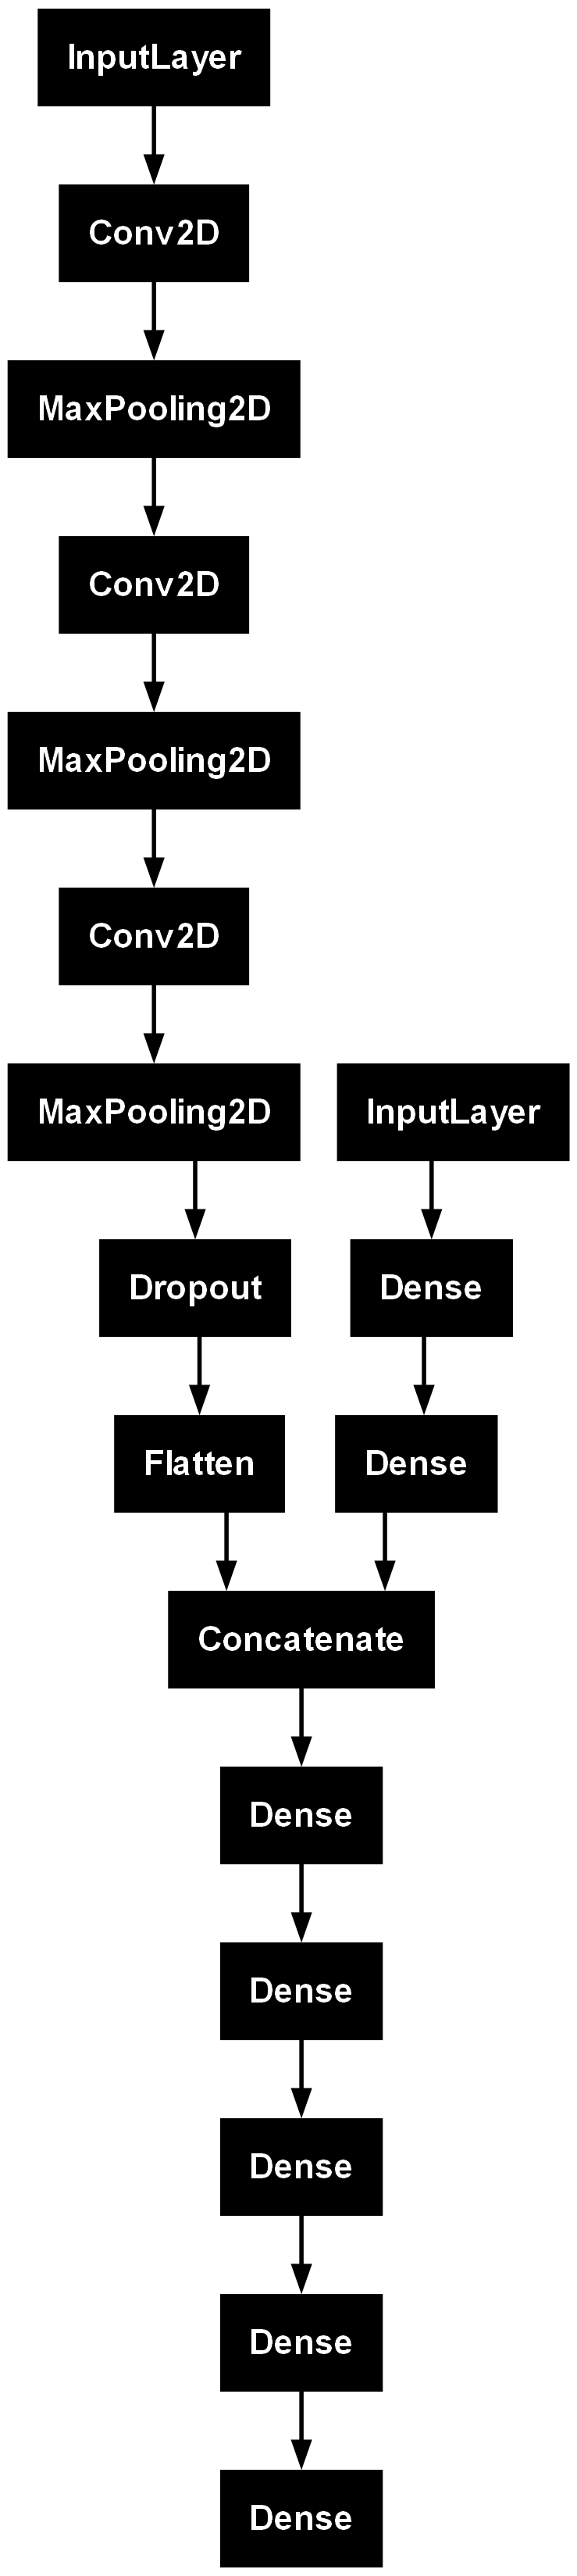

In [55]:
train1 = train_ds
val1 = val_ds


keras.utils.plot_model(model)

In [56]:
early_stopping = EarlyStopping(patience=3)
num_epochs = 10


In [57]:
history = model.fit(train_ds, validation_data=val_ds, epochs=num_epochs)

Epoch 1/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 18s 445ms/step - loss: 90.2828 - val_loss: 0.0000e+00
Epoch 2/10


C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2288.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


34/34 ━━━━━━━━━━━━━━━━━━━━ 15s 430ms/step - loss: 53.8027 - val_loss: 0.0000e+00
Epoch 3/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 15s 441ms/step - loss: 53.4109 - val_loss: 0.0000e+00
Epoch 4/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 13s 394ms/step - loss: 56.2920 - val_loss: 0.0000e+00
Epoch 5/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 15s 445ms/step - loss: 50.1882 - val_loss: 0.0000e+00
Epoch 6/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 15s 431ms/step - loss: 52.0694 - val_loss: 0.0000e+00
Epoch 7/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 15s 435ms/step - loss: 51.9026 - val_loss: 0.0000e+00
Epoch 8/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 14s 414ms/step - loss: 51.8701 - val_loss: 0.0000e+00
Epoch 9/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 14s 409ms/step - loss: 51.2117 - val_loss: 0.0000e+00
Epoch 10/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 14s 422ms/step - loss: 48.6360 - val_loss: 0.0000e+00


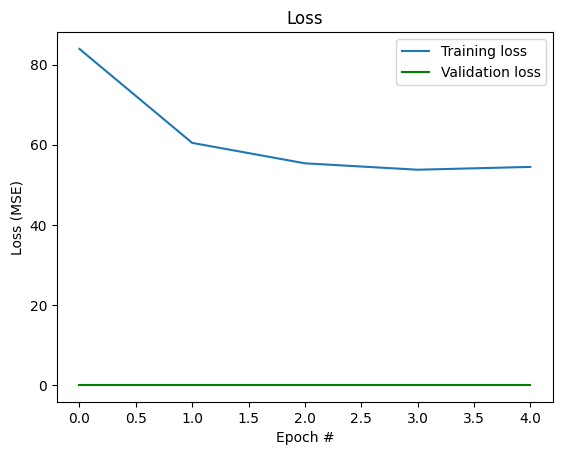

In [ ]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], 'g', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('Loss (MSE)')
plt.title('Loss')
plt.legend()
plt.show()

# transfer learning

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from keras.regularizers import l2

resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

for layer in resnet50.layers:
    layer.trainable = False
    
x = Flatten()(resnet50.output)
x = Dense(128, activation='relu', kernel_regularizer=l2(0.001))(x)
x = Dropout(0.5)(x)
predictions = Dense(1)(x)

stop_early = EarlyStopping(monitor='val_loss', patience=3)

resnet_50 = Model(inputs=resnet50.input, outputs=predictions)

In [ ]:
resnet_50.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mape')

history = resnet_50.fit(train_dataset, epochs=30, validation_data=val_dataset, callbacks=[stop_early])

Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 66s 580ms/step - loss: 98.3069 - val_loss: 92.5938
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 72s 722ms/step - loss: 89.4144 - val_loss: 82.2087
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 74s 735ms/step - loss: 80.1560 - val_loss: 77.7879
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 74s 742ms/step - loss: 77.1000 - val_loss: 76.1655
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 76s 763ms/step - loss: 75.9401 - val_loss: 74.9508
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 76s 765ms/step - loss: 75.7793 - val_loss: 74.2151
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 78s 780ms/step - loss: 75.3187 - val_loss: 73.7856
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 73s 732ms/step - loss: 74.3404 - val_loss: 73.3121
Epoch 9/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 70s 703ms/step - loss: 74.2127 - val_loss: 73.1087
Epoch 10/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 76s 757ms/step - loss: 73.3928 - val_loss: 72.9078
Epoch 11/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 74s 746ms/step - loss: 73.3237 - val_

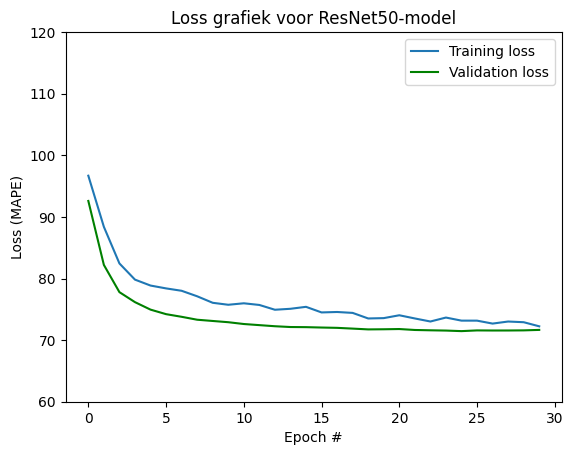

In [ ]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], 'g', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('Loss (MAPE)')
plt.title('Loss grafiek voor ResNet50-model')
plt.legend()
plt.ylim(60, 120)  
plt.show()

In [ ]:
resnet50_2 = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
fine_tune_at = 80

for layer in resnet50_2.layers[:fine_tune_at]:
    layer.trainable = False

x = GlobalAveragePooling2D()(resnet50_2.output)
x = Flatten()(resnet50_2.output)
x = Dense(128, activation='relu', kernel_regularizer=l2(0.001))(x)
x = Dropout(0.5)(x)
predictions = Dense(1)(x)

resnet_50_2 = Model(inputs=resnet50_2.input, outputs=predictions)

resnet_50_2.compile(optimizer=Adam(learning_rate=0.001), loss='mape')

stop_early = EarlyStopping(monitor='val_loss', patience=3)

history1 = resnet_50_2.fit(train_dataset, epochs=10, validation_data=val_dataset, callbacks=[stop_early])

Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 100s 788ms/step - loss: 92.3505 - val_loss: 100.7616
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 78s 780ms/step - loss: 71.8509 - val_loss: 85.2120
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 79s 788ms/step - loss: 71.4767 - val_loss: 73.8780
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 80s 798ms/step - loss: 69.7283 - val_loss: 95.3668
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 75s 755ms/step - loss: 64.6518 - val_loss: 138.8791
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 89s 889ms/step - loss: 67.5451 - val_loss: 82.3855
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 96s 964ms/step - loss: 66.0465 - val_loss: 91.6187
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 83s 829ms/step - loss: 61.3310 - val_loss: 103.2337


In [ ]:
plt.plot(history1.history['loss'], label='Training loss')
plt.plot(history1.history['val_loss'], 'g', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('Loss (MAPE)')
plt.title('Loss grafiek voor ResNet50-model')
plt.legend()
plt.ylim(40,150)  
plt.show()

NameError: name 'plt' is not defined

# De modelarchitectuur
De modelarchitectuur die we heb gekozen is ResNet-50, en deze is vooraf getraind op de ImageNet-dataset.

ResNet staat voor Residual Network, en het is een diep neuraal netwerkarchitectuur dat bekend staat om zijn diepte en efficiëntie in het trainen van diepe netwerken. ResNet-50 is een specifieke variant van ResNet met 50 lagen.

ImageNet is een van de grootste openbare datasets voor beeldclassificatie, bestaande uit miljoenen gelabelde afbeeldingen die behoren tot duizenden verschillende klassen. Deze dataset wordt vaak gebruikt voor het trainen en benchmarken van beeldherkenningssystemen vanwege de diversiteit en omvang van de gegevens.

(Kundu, 2023)

# Voordelen

het gebruik van Vooraf getrainde visionmodellen heeft meerdere voordelen:

**Transfer Learning:** Vooraf getrainde visionmodellen hebben al een enorme hoeveelheid kennis opgedaan tijdens het trainen op grote datasets zoals ImageNet. Deze kennis omvat het herkennen van verschillende kenmerken, vormen, texturen en patronen in afbeeldingen. Door deze modellen te gebruiken, kunnen we profiteren van deze geleerde kenmerken en ze overdragen naar nieuwe, specifieke taken met andere datasets. Dit vermindert de hoeveelheid data die nodig is om een nieuw model te trainen en verbetert over het algemeen de
prestaties.

**Besparing van rekenkracht en tijd:** Het trainen van deep learning-modellen vanaf nul op grote datasets vereist aanzienlijke rekenbronnen, waaronder krachtige GPU's, tijd en geld. Door vooraf getrainde modellen te gebruiken, vermijden we het proces vanaf nul trainen en kunnen we profiteren van de reeds geleerde kenmerken, wat resulteert in minder trainingstijd en lagere kosten.

**Verbeterde Generalisatie:** Vooraf getrainde modellen hebben vaak een goede generalisatievermogen, wat betekent dat ze goed presteren op ongeziene data. Dit komt doordat ze zijn getraind op grote en diverse datasets, waardoor ze een brede kennis hebben van verschillende kenmerken en concepten in afbeeldingen. Hierdoor kunnen ze beter presteren bij het classificeren van nieuwe afbeeldingen, zelfs als die afbeeldingen niet exact overeenkomen met de trainingsgegevens.

# stappen van fine-tunen
Het finetunen van een vooraf getraind model, zoals ResNet50, omvat verschillende stappen om het model aan te passen aan een nieuwe dataset en een nieuwe taak. Hier zijn de stappen in detail:

1. Vooraf getraind model laden: We laden een vooraf getraind model, in dit geval ResNet50, dat is getraind op een grote dataset zoals ImageNet. Het vooraf getrainde model heeft geleerd om algemene functies te extraheren die relevant zijn voor verschillende visuele taken.

2. Bevriezen van de gewichten: Om te voorkomen dat de reeds geleerde representaties in de vroege lagen van het netwerk worden overschreven, bevriezen we de gewichten van deze lagen. Dit betekent dat deze lagen niet zullen worden bijgewerkt tijdens het fine-tunen. In ons geval bevriezen we alle lagen van het basisnetwerk door de trainable eigenschap van elke laag op False in te stellen.

3. Toevoegen van layers:
- Global Average Pooling (GAP) laag: Deze laag wordt gebruikt om de ruimtelijke informatie in de uitvoer van het vooraf getrainde Convolutional Neural Network (CNN) te verminderen. In plaats van het gebruikelijke gebruik van een Flatten-laag, die alle ruimtelijke informatie in één lange vector omzet, gebruiken we hier een GAP-laag. Deze laag berekent het gemiddelde van elk kenmerkkaartkanaal over de gehele ruimte, resulterend in een enkel kenmerk per kanaal. Dit helpt om de dimensionaliteit te verminderen en tegelijkertijd de belangrijkste kenmerken te behouden.

- Dense laag van 128 neuronen met l2-regularisatie: Deze laag volgt na de GAP-laag en heeft 128 neuronen. Hier wordt ook l2-regularisatie toegepast om overfitting te voorkomen. De l2-regularisatie wordt toegepast door een term aan de loss-functie toe te voegen, waardoor de gewichten van het model worden ontmoedigd om te groot te worden. Het doel is om een goede balans te vinden tussen het model trainen op de trainingsdata en het vermijden van te veel aanpassing aan ruis in de data.

- Dropout laag van 50%: Deze laag wordt gebruikt om overfitting verder te verminderen. Tijdens het trainen wordt willekeurig de helft van de neuronen uitgeschakeld, waardoor het model gedwongen wordt om robuuster te worden en niet te afhankelijk te zijn van specifieke kenmerken in de data. Een dropout van 50% betekent dat de helft van de neuronen wordt uitgeschakeld tijdens elke trainingsstap.

4. Training configuratie: We configureren het model voor training door het te compileren met een optimizer (in ons geval Adam), een loss-functie (mean absolute percentage error, omdat we een regressietaak hebben), en mogelijke evaluatiemetrieken, hoewel voor regressie de focus voornamelijk ligt op de loss-functie.

5. Data inladen: We laden de trainings- en validatiedatasets.

6. Training: We trainen het model door het aan te passen aan de trainingsdata. Tijdens deze fase worden de gewichten van de nieuwe lagen aangepast via backpropagatie, terwijl de gewichten van de bevroren lagen ongewijzigd blijven.

7. Evaluatie: Na het trainen evalueren we het model op de validatiedataset om de prestaties te controleren. We gebruiken de validation_generator om batches van validatievoorbeelden te genereren en berekenen de nauwkeurigheid en het verlies op deze voorbeelden.

8. Fine-tuning: Als de prestaties van het model niet goed genoeg zijn, kunnen we ervoor kiezen om extra fine-tuning uit te voeren, zoals het aanpassen van de architectuur van het model, het veranderen van de hyperparameters of het toevoegen van meer trainingsdata.

9. Visualisatie van resultaten: Ten slotte kunnen we de voorspellingen van het getrainde model visualiseren en analyseren om inzicht te krijgen in de prestaties en eventuele verbeteringen die kunnen worden aangebracht.

# bevindingen


prestaties avn de moddellen:

Fully-Connected Neural Network: loss: 30.6573  Test loss (MAPE): 28.589996337890625

Convolutioneel neuraal netwerk: loss: 60.1540 - val_loss: 71.4526

multi modaal: loss: 65.2670 - val_loss: 0.0000e+00

transfer learning: loss: 61.3310 - val_loss: 103.2337


Beste model:
Het beste model lijkt het Fully-Connected Neural Network te zijn. Dit kan worden verklaard door zijn eenvoudige structuur, wat het minder vatbaar maakt voor overfitting. Dit model maakt gebruik van alleen tabulaire data, wat betekent dat het directe informatie heeft over de huizen zonder te hoeven interpreteren op basis van afbeeldingen. Hierdoor kan het model beter patronen herkennen in de data en nauwkeuriger voorspellingen doen


Slechtste model:
Het Multi Modale model lijkt het minst effectief te zijn. Dit is verrassend, omdat vaak wordt verwacht dat modellen die meerdere modaliteiten (zoals tekst, afbeeldingen, etc.) combineren, betere prestaties zouden leveren. Echter, in dit geval lijkt het model beperkt door de beperkte informatie die het ontvangt, namelijk alleen afbeeldingen en prijslabels. De complexiteit van de huizenmarkt en de variabiliteit in prijzen zijn moeilijk te voorspellen en te verklaren met alleen deze twee gegevensbronnen. Het ontbreken van meta-data zoals de grootte, locatie, aantal slaapkamers en badkamers kan het model belemmeren om nauwkeurige voorspellingen te doen. Het Multi Modale model heeft dus meer data nodig om goed te presteren, bij voorkeur inclusief de meta-data die belangrijk is voor het voorspellen van huizenprijzen. Daarnaast vereist dit model aanzienlijke rekenkracht en tijd voor training, wat het minder praktisch maakt voor gebruik in real-world toepassingen.

# conclusie

We kunnen concluderen dat het Fully-Connected Neural Network het beste presteerde in het voorspellen van huizenprijzen. Dit komt waarschijnlijk door de eenvoudige structuur van het model en het directe gebruik van tabulaire data, waardoor het beter in staat is om patronen in de data te herkennen zonder de complexiteit van afbeeldingen te hoeven interpreteren.

Aan de andere kant presteerde het Multi Modale model het slechtst. Dit model combineert afbeeldingsdata met prijslabels, maar lijkt beperkt te zijn door het gebrek aan aanvullende informatie, zoals metadata over de huizen. Dit suggereert dat meer diverse en uitgebreide datasets nodig zijn om het Multi Modale model effectief te laten presteren.

Ook presteerde de CNN en transfer learning modellen minder goed. De reden dat de CNN en Transfer Learning modellen het minder deden, zou kunnen zijn omdat deze modellen normaal gesproken goed zijn voor taken waarbij je dingen in afbeeldingen moet herkennen. Maar, het voorspellen van huisprijzen gaat niet alleen over wat je op een foto ziet, maar ook over dingen zoals metadata over de huizen. 

De conclusie hieruit is dat het belangrijk is om zorgvuldig te overwegen welke informatie wordt gebruikt bij het voorspellen van huizenprijzen. Hoewel het verleidelijk kan zijn om complexe modellen te gebruiken die meerdere gegevensmodaliteiten combineren, zoals afbeeldingen en tabulaire gegevens, kan een eenvoudiger model dat directe informatie gebruikt betere resultaten opleveren als de dataset beperkt is.

# aanbeveling

Aangezien alleen Fully connected neural network het enige goede model is, raden we aan om dat model te gebruiken om huisprijzen te voorspellen, ons beste model is best accuraat met naar onze mening niet al teveel data. belangrijk hierbij is dat de Fully connected neural network een simpel model is. Dit is ook handig voor de makelaars die minder tijd hoeven te besteden in het begrijpen van het model en het maken van de voorspelling vergeleken met een ander model. voor de huizen verkopers of kopers is een simpelere model handiger. ook hebben de meeste mensen niet de best hardware om een complex model goed te gebruiken. hierdoor raden we het simpelere Fully connected neural network model te gebruiken.

### Bronnenlijst

Brownlee, J. (2019, 6 augustus). A Gentle Introduction to Dropout for Regularizing Deep Neural Networks. MachineLearningMastery.com. https://machinelearningmastery.com/dropout-for-regularizing-deep-neural-networks/ 

Garbin, C., Zhu, X., & Marques, O. (2020). Dropout vs. batch normalization: an empirical study of their impact to deep learning. Multimedia Tools And Applications, 79(19–20), 12777–12815. https://doi.org/10.1007/s11042-019-08453-9 Science, 

B. O. C., & Science, B. O. C. (2024, 18 maart). How ReLU and Dropout Layers Work in CNNs | Baeldung on Computer Science. Baeldung On Computer Science. https://www.baeldung.com/cs/ml-relu-dropout-layers 

Team, K. (z.d.). Keras documentation: BatchNormalization layer. https://keras.io/api/layers/normalization_layers/batch_normalization/

Kundu, N. (2023, 23 januari). Exploring ResNet50: An In-Depth Look at the Model Architecture and Code Implementation. Medium. https://medium.com/@nitishkundu1993/exploring-resnet50-an-in-depth-look-at-the-model-architecture-and-code-implementation-d8d8fa67e46f